# __Financial Prediction research (Sytnthetic Markets)__


Research about financial prediction on sytnthetic markets.
Deriv Sytnthetic instruments are be used.

# Import Libraries

In [1]:
# base import
import pandas as pd
import pandas_ta as ta
import matplotlib as matplot
import matplotlib.pyplot as plt
import numpy as np
import sklearn as sk
import os
import sys
import keras
import json
import yaml
import time
import random 
import tensorflow as tf
import seaborn as sns

from typing import List, Tuple
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer

from IPython.display import clear_output
from keras.models import Sequential
from keras.layers import LSTM, GRU
from keras.utils import to_categorical
from keras.optimizers import SGD
from keras.callbacks import LearningRateScheduler
from IPython.display import clear_output
import h5py

# import jtplot module in notebook
from jupyterthemes import jtplot

# choose which theme to inherit plotting style from
# onedork | grade3 | oceans16 | chesterish | monokai | solarizedl | solarizedd
# jtplot.style(theme='solarizedd')

%matplotlib inline

2024-03-10 02:05:35.159521: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-03-10 02:05:35.237934: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-10 02:05:35.237979: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-10 02:05:35.239146: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-03-10 02:05:35.246570: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-03-10 02:05:36.884212: W tensorflow/compiler/tf2tensorrt/utils/py_utils.

In [2]:
def set_seeds(seed=100):
    random.seed(seed)
    np.random.seed(seed)
    tf.random.set_seed(seed)

set_seeds()

# Library Version and Docs

In [3]:
print("Library version:")
print("\t-  pandas: {}".format(pd.__version__))
print("\t-  numpy: {}".format(np.__version__))
print("\t-  sklearn: {}".format(sk.__version__))
print("\t-  matplotlib: {}".format(matplot.__version__))
print("\t-  python: {}".format(sys.version[:sys.version.find('(') - 1]))

Library version:
	-  pandas: 1.5.3
	-  numpy: 1.24.3
	-  sklearn: 1.3.2
	-  matplotlib: 3.7.1
	-  python: 3.9.18


In [4]:
df = pd.DataFrame()

df.ta.indicators()

Pandas TA - Technical Analysis Indicators - v0.3.14b0
Total Indicators & Utilities: 205
Abbreviations:
    aberration, above, above_value, accbands, ad, adosc, adx, alma, amat, ao, aobv, apo, aroon, atr, bbands, below, below_value, bias, bop, brar, cci, cdl_pattern, cdl_z, cfo, cg, chop, cksp, cmf, cmo, coppock, cross, cross_value, cti, decay, decreasing, dema, dm, donchian, dpo, ebsw, efi, ema, entropy, eom, er, eri, fisher, fwma, ha, hilo, hl2, hlc3, hma, hwc, hwma, ichimoku, increasing, inertia, jma, kama, kc, kdj, kst, kurtosis, kvo, linreg, log_return, long_run, macd, mad, massi, mcgd, median, mfi, midpoint, midprice, mom, natr, nvi, obv, ohlc4, pdist, percent_return, pgo, ppo, psar, psl, pvi, pvo, pvol, pvr, pvt, pwma, qqe, qstick, quantile, rma, roc, rsi, rsx, rvgi, rvi, short_run, sinwma, skew, slope, sma, smi, squeeze, squeeze_pro, ssf, stc, stdev, stoch, stochrsi, supertrend, swma, t3, td_seq, tema, thermo, tos_stdevall, trima, trix, true_range, tsi, tsignals, ttm_trend, ui, 

In [5]:
help(ta.sma)

Help on function sma in module pandas_ta.overlap.sma:

sma(close, length=None, talib=None, offset=None, **kwargs)
    Simple Moving Average (SMA)
    
    The Simple Moving Average is the classic moving average that is the equally
    weighted average over n periods.
    
    Sources:
        https://www.tradingtechnologies.com/help/x-study/technical-indicator-definitions/simple-moving-average-sma/
    
    Calculation:
        Default Inputs:
            length=10
        SMA = SUM(close, length) / length
    
    Args:
        close (pd.Series): Series of 'close's
        length (int): It's period. Default: 10
        talib (bool): If TA Lib is installed and talib is True, Returns the TA Lib
            version. Default: True
        offset (int): How many periods to offset the result. Default: 0
    
    Kwargs:
        adjust (bool): Default: True
        presma (bool, optional): If True, uses SMA for initial value.
        fillna (value, optional): pd.DataFrame.fillna(value)
     

# Load data

In [6]:
# Step Index_202206010000_202312220938.csv'
# 
# Step Index_H1_201905280700_202312220900
# Crash 300 Index_H1_202107301100_202312220900
# Crash 500 Index_H1_201907120800_202312220900
# Crash 1000 Index_H1_201904170900_202312221000
# Boom 300 Index_H1_202107301100_202312220900
# Boom 500 Index_H1_201907120800_202312220900
# Boom 1000 Index_H1_201904170900_202312221000
# Volatility 10 Index_H1_201901010500_202312221000
# Volatility 50 Index_H1_201901010500_202312221000
# Volatility 75 Index_H1_201901010500_202312221000
# Volatility 100 Index_H1_201901010500_202312221000
# 
# 
file_name = 'Step Index_H1_201905280700_202312220900'  
# 
details = file_name.split("_")
ticker = details[0]
tf = details[1]
# 
details

['Step Index', 'H1', '201905280700', '202312220900']

In [7]:
df = pd.read_csv(f'../data/{file_name}.csv', sep='\t')
# df = pd.read_csv('../data/step_index_tickers.csv')

In [8]:
# df.columns = ['date', 'time', 'bid', 'ask', 'last', 'volume', 'flags']
df.columns = ['date', 'time', 'open', 'high', 'low', 'close', 'tick_volume', 'volume', 'spread']

In [9]:
df.shape

(40056, 9)

In [10]:
df.head(20)

,date,time,open,high,low,close,tick_volume,volume,spread
0,2019.05.28,07:00:00,10040.1,10043.3,10038.0,10038.9,1597,0,2
1,2019.05.28,08:00:00,10038.8,10040.5,10033.1,10036.9,3600,0,2
2,2019.05.28,09:00:00,10037.0,10048.0,10036.4,10041.9,3600,0,2
3,2019.05.28,10:00:00,10042.0,10047.1,10039.9,10039.9,3600,0,2
4,2019.05.28,11:00:00,10040.0,10041.6,10029.8,10030.1,3600,0,2
5,2019.05.28,12:00:00,10030.2,10033.5,10026.4,10028.5,3600,0,2
6,2019.05.28,13:00:00,10028.4,10032.9,10017.1,10017.1,3600,0,2
7,2019.05.28,14:00:00,10017.2,10029.1,10015.1,10028.5,3600,0,2
8,2019.05.28,15:00:00,10028.6,10035.5,10028.5,10033.1,3600,0,2
9,2019.05.28,16:00:00,10033.2,10034.1,10025.4,10026.9,3600,0,2


In [11]:
# df['last'].isna().sum()

In [12]:
df['volume'].isna().sum()

0

In [13]:
df['spread'].isna().sum()

0

In [14]:
# df['flags'].value_counts()

In [15]:
df['merge_date'] = df['date'].map(str) + " " +  df['time']

In [16]:
df.head(20)

,date,time,open,high,low,close,tick_volume,volume,spread,merge_date
0,2019.05.28,07:00:00,10040.1,10043.3,10038.0,10038.9,1597,0,2,2019.05.28 07:00:00
1,2019.05.28,08:00:00,10038.8,10040.5,10033.1,10036.9,3600,0,2,2019.05.28 08:00:00
2,2019.05.28,09:00:00,10037.0,10048.0,10036.4,10041.9,3600,0,2,2019.05.28 09:00:00
3,2019.05.28,10:00:00,10042.0,10047.1,10039.9,10039.9,3600,0,2,2019.05.28 10:00:00
4,2019.05.28,11:00:00,10040.0,10041.6,10029.8,10030.1,3600,0,2,2019.05.28 11:00:00
5,2019.05.28,12:00:00,10030.2,10033.5,10026.4,10028.5,3600,0,2,2019.05.28 12:00:00
6,2019.05.28,13:00:00,10028.4,10032.9,10017.1,10017.1,3600,0,2,2019.05.28 13:00:00
7,2019.05.28,14:00:00,10017.2,10029.1,10015.1,10028.5,3600,0,2,2019.05.28 14:00:00
8,2019.05.28,15:00:00,10028.6,10035.5,10028.5,10033.1,3600,0,2,2019.05.28 15:00:00
9,2019.05.28,16:00:00,10033.2,10034.1,10025.4,10026.9,3600,0,2,2019.05.28 16:00:00


In [17]:
df['date'] = df['merge_date']

In [18]:
df

,date,time,open,high,low,close,tick_volume,volume,spread,merge_date
0,2019.05.28 07:00:00,07:00:00,10040.1,10043.3,10038.0,10038.9,1597,0,2,2019.05.28 07:00:00
1,2019.05.28 08:00:00,08:00:00,10038.8,10040.5,10033.1,10036.9,3600,0,2,2019.05.28 08:00:00
2,2019.05.28 09:00:00,09:00:00,10037.0,10048.0,10036.4,10041.9,3600,0,2,2019.05.28 09:00:00
3,2019.05.28 10:00:00,10:00:00,10042.0,10047.1,10039.9,10039.9,3600,0,2,2019.05.28 10:00:00
4,2019.05.28 11:00:00,11:00:00,10040.0,10041.6,10029.8,10030.1,3600,0,2,2019.05.28 11:00:00
...,...,...,...,...,...,...,...,...,...,...
40051,2023.12.22 05:00:00,05:00:00,8452.7,8456.1,8446.2,8450.2,3600,0,1,2023.12.22 05:00:00
40052,2023.12.22 06:00:00,06:00:00,8450.3,8452.9,8442.6,8446.8,3600,0,1,2023.12.22 06:00:00
40053,2023.12.22 07:00:00,07:00:00,8446.9,8448.3,8438.2,8438.2,3600,0,1,2023.12.22 07:00:00
40054,2023.12.22 08:00:00,08:00:00,8438.1,8449.6,8438.1,8446.4,3600,0,1,2023.12.22 08:00:00


In [19]:
# df.drop(columns=['last', 'volume', 'flags'], axis=1, inplace=True)
df.drop(columns=['volume', 'spread', 'merge_date', 'time'], axis=1, inplace=True)

In [20]:
# df.columns.rename({'tick_volume': 'volume'}, inplace=True)

In [21]:
df

,date,open,high,low,close,tick_volume
0,2019.05.28 07:00:00,10040.1,10043.3,10038.0,10038.9,1597
1,2019.05.28 08:00:00,10038.8,10040.5,10033.1,10036.9,3600
2,2019.05.28 09:00:00,10037.0,10048.0,10036.4,10041.9,3600
3,2019.05.28 10:00:00,10042.0,10047.1,10039.9,10039.9,3600
4,2019.05.28 11:00:00,10040.0,10041.6,10029.8,10030.1,3600
...,...,...,...,...,...,...
40051,2023.12.22 05:00:00,8452.7,8456.1,8446.2,8450.2,3600
40052,2023.12.22 06:00:00,8450.3,8452.9,8442.6,8446.8,3600
40053,2023.12.22 07:00:00,8446.9,8448.3,8438.2,8438.2,3600
40054,2023.12.22 08:00:00,8438.1,8449.6,8438.1,8446.4,3600


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40056 entries, 0 to 40055
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         40056 non-null  object 
 1   open         40056 non-null  float64
 2   high         40056 non-null  float64
 3   low          40056 non-null  float64
 4   close        40056 non-null  float64
 5   tick_volume  40056 non-null  int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 1.8+ MB


In [23]:
# df.to_csv('../data/step_index_tickers.csv') 
df.to_csv(f"../data/{file_name}_processed.csv") 

# EDA and Add Features

In [24]:
# https://github.com/twopirllc/pandas-ta/blob/main/examples/AIExample.ipynb

In [25]:
features_df = df.copy() 

# VWAP requires the DataFrame index to be a DatetimeIndex.
# Replace "datetime" with the appropriate column from your DataFrame
features_df.set_index(pd.DatetimeIndex(features_df["date"]), inplace=True)
features_df.drop(columns=['date'], inplace=True)

# Calculate Returns and append to the features_df DataFrame
# features_df.ta.log_return(cumulative=True, append=True)
# features_df.ta.percent_return(cumulative=True, append=True)


### Add TA Indicators

In [26]:
# https://twopirllc.github.io/pandas-ta/#momentum-41
# 
# momentum indicators
features_df.ta.mom(append=True)
features_df.ta.rsi(append=True)
features_df.ta.tsi(append=True)
features_df.ta.er(append=True)
features_df.ta.fisher(append=True)

# volatility indicators
features_df.ta.true_range(append=True)
features_df.ta.rvi(append=True)
features_df.ta.bbands(append=True)
features_df.ta.pdist(append=True)

# statistics indicators
features_df.ta.skew(append=True)
features_df.ta.kurtosis(append=True)
features_df.ta.mad(append=True)
features_df.ta.zscore(append=True)
features_df.ta.entropy(append=True)

# trend indicators
features_df.ta.adx(append=True)
features_df.ta.dpo(lookahead=False, append=True)
features_df.ta.psar(append=True)
features_df.ta.long_run(append=True)
features_df.ta.short_run(append=True)
features_df.ta.qstick(append=True)

# volume indicators
# features_df.ta.obv(append=True)

# overlap indicators
features_df.ta.linreg(append=True)
features_df.ta.supertrend(append=True)
features_df.ta.hilo(append=True)
features_df.ta.hlc3(append=True)
features_df.ta.ohlc4(append=True)

# sma_windows = [1, 5, 10, 15, 60]
sma_windows = [2, 10, 15, 60]
for ma_window in sma_windows:
    features_df.ta.sma(length=ma_window, sma=False, append=True)

ema_windows = [8, 21, 50]
for ma_window in ema_windows:
    features_df.ta.ema(length=ma_window, sma=False, append=True)

# performance indicators
features_df.ta.percent_return(append=True)


print("TA Columns Added")

TA Columns Added


#### Modify RSI(relative strength index) Indicator

- The RSI provides technical traders with signals about bullish and bearish price momentum, and it is often plotted beneath the graph of an asset’s price.
  
- An asset is usually considered overbought when the RSI is above 70 and oversold when it is below 30.
  
- The RSI line crossing below the overbought line or above oversold line is often seen by traders as a signal to buy or sell.
  
- The RSI works best in trading ranges rather than trending markets.

In [27]:
features_df["RSI_14"] = features_df["RSI_14"].round() # 2

In [28]:
features_df["RSI_14"].value_counts()

49.0    1380
50.0    1336
48.0    1332
52.0    1288
51.0    1287
        ... 
87.0       4
90.0       3
13.0       3
12.0       2
89.0       1
Name: RSI_14, Length: 79, dtype: int64

In [29]:
features_df["RSI_14"].mean()

49.55878827231407

In [30]:
features_df["RSI_14"].median()

49.0

In [31]:
features_df["RSI_14"].mode()

0    49.0
Name: RSI_14, dtype: float64

In [32]:
features_df[features_df["RSI_14"] >= 70]["RSI_14"].value_counts()

71.0    272
72.0    248
73.0    186
74.0    169
76.0    120
75.0    111
77.0     82
78.0     62
79.0     38
80.0     34
81.0     29
82.0     24
83.0     20
85.0     14
84.0     10
86.0      7
88.0      4
87.0      4
90.0      3
89.0      1
Name: RSI_14, dtype: int64

In [33]:
features_df[features_df["RSI_14"] <= 30]["RSI_14"].value_counts()

29.0    321
28.0    279
27.0    222
26.0    162
25.0    152
24.0    119
23.0    101
22.0     84
21.0     68
20.0     44
19.0     40
18.0     21
16.0     18
17.0     18
15.0      9
14.0      5
13.0      3
12.0      2
Name: RSI_14, dtype: int64

In [34]:
# New Columns with results
features_df.columns

Index(['open', 'high', 'low', 'close', 'tick_volume', 'MOM_10', 'RSI_14',
       'TSI_13_25_13', 'TSIs_13_25_13', 'ER_10', 'FISHERT_9_1', 'FISHERTs_9_1',
       'TRUERANGE_1', 'RVI_14', 'BBL_5_2.0', 'BBM_5_2.0', 'BBU_5_2.0',
       'BBB_5_2.0', 'BBP_5_2.0', 'PDIST', 'SKEW_30', 'KURT_30', 'MAD_30',
       'ZS_30', 'ENTP_10', 'ADX_14', 'DMP_14', 'DMN_14', 'DPO_20',
       'PSARl_0.02_0.2', 'PSARs_0.02_0.2', 'PSARaf_0.02_0.2', 'PSARr_0.02_0.2',
       'QS_10', 'LR_14', 'SUPERT_7_3.0', 'SUPERTd_7_3.0', 'SUPERTl_7_3.0',
       'SUPERTs_7_3.0', 'HILO_13_21', 'HILOl_13_21', 'HILOs_13_21', 'HLC3',
       'OHLC4', 'SMA_2', 'SMA_10', 'SMA_15', 'SMA_60', 'EMA_8', 'EMA_21',
       'EMA_50', 'PCTRET_1'],
      dtype='object')

### Add Candle Stick Patterns  

In [35]:
features_df.ta.cdl_pattern(name="all", append=True)

,CDL_2CROWS,CDL_3BLACKCROWS,CDL_3INSIDE,CDL_3LINESTRIKE,CDL_3OUTSIDE,CDL_3STARSINSOUTH,CDL_3WHITESOLDIERS,CDL_ABANDONEDBABY,CDL_ADVANCEBLOCK,CDL_BELTHOLD,...,CDL_SPINNINGTOP,CDL_STALLEDPATTERN,CDL_STICKSANDWICH,CDL_TAKURI,CDL_TASUKIGAP,CDL_THRUSTING,CDL_TRISTAR,CDL_UNIQUE3RIVER,CDL_UPSIDEGAP2CROWS,CDL_XSIDEGAP3METHODS
date,,,,,,,,,,,,,,,,,,,,,
2019-05-28 07:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2019-05-28 08:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2019-05-28 09:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2019-05-28 10:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2019-05-28 11:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-22 05:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2023-12-22 06:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2023-12-22 07:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [36]:
features_df.columns

Index(['open', 'high', 'low', 'close', 'tick_volume', 'MOM_10', 'RSI_14',
       'TSI_13_25_13', 'TSIs_13_25_13', 'ER_10',
       ...
       'CDL_SPINNINGTOP', 'CDL_STALLEDPATTERN', 'CDL_STICKSANDWICH',
       'CDL_TAKURI', 'CDL_TASUKIGAP', 'CDL_THRUSTING', 'CDL_TRISTAR',
       'CDL_UNIQUE3RIVER', 'CDL_UPSIDEGAP2CROWS', 'CDL_XSIDEGAP3METHODS'],
      dtype='object', length=114)

In [37]:
# Take a peek
features_df.tail()

# vv Continue Post Processing vv

,open,high,low,close,tick_volume,MOM_10,RSI_14,TSI_13_25_13,TSIs_13_25_13,ER_10,...,CDL_SPINNINGTOP,CDL_STALLEDPATTERN,CDL_STICKSANDWICH,CDL_TAKURI,CDL_TASUKIGAP,CDL_THRUSTING,CDL_TRISTAR,CDL_UNIQUE3RIVER,CDL_UPSIDEGAP2CROWS,CDL_XSIDEGAP3METHODS
date,,,,,,,,,,,,,,,,,,,,,
2023-12-22 05:00:00,8452.7,8456.1,8446.2,8450.2,3600,-23.4,33.0,-25.821352,-16.851931,0.381107,...,-100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2023-12-22 06:00:00,8450.3,8452.9,8442.6,8446.8,3600,-36.6,31.0,-27.696818,-18.401201,0.665455,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2023-12-22 07:00:00,8446.9,8448.3,8438.2,8438.2,3600,-30.2,27.0,-30.643657,-20.150123,0.621399,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2023-12-22 08:00:00,8438.1,8449.6,8438.1,8446.4,3600,-25.2,36.0,-30.424510,-21.617893,0.470149,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2023-12-22 09:00:00,8446.3,8450.2,8445.0,8450.0,2096,-19.0,39.0,-29.169475,-22.696690,0.347985,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Trend Creation
A Trend is the result of some calculation or condition of one or more indicators. For simplicity, a Trend is either True or 1 and No Trend is False or 0. Using the Hello World of Trends, the Golden/Death Cross, it's Trend is Long when long = ma(close, 50) > ma(close, 200)  and Short when short = ma(close, 50) < ma(close, 200) .

In [38]:
# Example Long Trends
# long = ta.sma(features_df.close, 50) > ta.sma(features_df.close, 200) # SMA(50) > SMA(200) "Golden/Death Cross"
# long = ta.sma(features_df.close, 10) > ta.sma(features_df.close, 20) # SMA(10) > SMA(20)
long = ta.ema(features_df.close, 8) > ta.ema(features_df.close, 21) # EMA(8) > EMA(21)
# long = ta.increasing(ta.ema(features_df.close, 50))
# long = ta.macd(features_df.close).iloc[:,1] > 0 # MACD Histogram is positive
# long = ta.amat(features_df.close, 50, 200).AMATe_LR_2  # Long Run of AMAT(50, 200) with lookback of 2 bars

# long &= ta.increasing(ta.ema(features_df.close, 50), 2) # Uncomment for further long restrictions, in this case when EMA(50) is increasing/sloping upwards
# long = 1 - long # uncomment to create a short signal of the trend

In [39]:
features_df.tail()

,open,high,low,close,tick_volume,MOM_10,RSI_14,TSI_13_25_13,TSIs_13_25_13,ER_10,...,CDL_SPINNINGTOP,CDL_STALLEDPATTERN,CDL_STICKSANDWICH,CDL_TAKURI,CDL_TASUKIGAP,CDL_THRUSTING,CDL_TRISTAR,CDL_UNIQUE3RIVER,CDL_UPSIDEGAP2CROWS,CDL_XSIDEGAP3METHODS
date,,,,,,,,,,,,,,,,,,,,,
2023-12-22 05:00:00,8452.7,8456.1,8446.2,8450.2,3600,-23.4,33.0,-25.821352,-16.851931,0.381107,...,-100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2023-12-22 06:00:00,8450.3,8452.9,8442.6,8446.8,3600,-36.6,31.0,-27.696818,-18.401201,0.665455,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2023-12-22 07:00:00,8446.9,8448.3,8438.2,8438.2,3600,-30.2,27.0,-30.643657,-20.150123,0.621399,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2023-12-22 08:00:00,8438.1,8449.6,8438.1,8446.4,3600,-25.2,36.0,-30.424510,-21.617893,0.470149,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2023-12-22 09:00:00,8446.3,8450.2,8445.0,8450.0,2096,-19.0,39.0,-29.169475,-22.696690,0.347985,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Trend Signals

Given a Trend, Trend Signals returns the Trend, Trades, Entries and Exits as boolean integers. When asbool=True, it returns Trends, Entries and Exits as boolean values which is helpful when combined with the [vectorbt](https://github.com/polakowo/vectorbt) backtesting package.

In [40]:
trendy = features_df.ta.tsignals(long, asbool=False, append=True)

trendy.tail()

,TS_Trends,TS_Trades,TS_Entries,TS_Exits
date,,,,
2023-12-22 05:00:00,0,0,0,0
2023-12-22 06:00:00,0,0,0,0
2023-12-22 07:00:00,0,0,0,0
2023-12-22 08:00:00,0,0,0,0
2023-12-22 09:00:00,0,0,0,0


### Trend Entries & Exits & Trade Table


This is a simple way to reduce the Asset DataFrame to a Trade Table with Dates, Signals, and Entries and Exits. Gives you an idea what to expect before running through a backtester such as [vectorbt](https://github.com/polakowo/vectorbt).

In [41]:
entries = trendy.TS_Entries * features_df.close
entries = entries[~np.isclose(entries, 0)]
entries.dropna(inplace=True)
entries.name = "Entry"

exits = trendy.TS_Exits * features_df.close
exits = exits[~np.isclose(exits, 0)]
exits.dropna(inplace=True)
exits.name = "Exit"

total_trades = trendy.TS_Trades.abs().sum()
rt_trades = int(trendy.TS_Trades.abs().sum() // 2)

all_trades = trendy.TS_Trades.copy().fillna(0)
all_trades = all_trades[all_trades != 0]

trades = pd.DataFrame({
    "Signal": all_trades,
    entries.name: entries,
    exits.name: exits
})

# Show some stats if there is an active trade (when there is an odd number of round trip trades)
if total_trades % 2 != 0:
    unrealized_pnl = features_df.close.iloc[-1] - entries.iloc[-1]
    unrealized_pnl_pct_change = 100 * ((features_df.close.iloc[-1] / entries.iloc[-1]) - 1)
    print("Current Trade:")
    print(f"Price Entry | Last:\t{entries.iloc[-1]:.4f} | {features_df.close.iloc[-1]:.4f}")
    print(f"Unrealized PnL | %:\t{unrealized_pnl:.4f} | {unrealized_pnl_pct_change:.4f}%")
print(f"\nTrades Total | Round Trip:\t{total_trades} | {rt_trades}")
print(f"Trade Coverage: {100 * features_df.TS_Trends.sum() / features_df.shape[0]:.2f}%")

trades


Trades Total | Round Trip:	1932 | 966
Trade Coverage: 47.83%


,Signal,Entry,Exit
date,,,
2019-05-29 03:00:00,1,10058.3,NaN
2019-05-29 17:00:00,-1,NaN,10033.3
2019-05-31 06:00:00,1,10017.7,NaN
2019-06-02 02:00:00,-1,NaN,10047.9
2019-06-03 17:00:00,1,10018.3,NaN
...,...,...,...
2023-12-20 06:00:00,-1,NaN,8470.5
2023-12-20 16:00:00,1,8487.0,NaN
2023-12-20 17:00:00,-1,NaN,8477.6


### Visualization

In [42]:
def colors(colors: str = None, default: str = "GrRd"):
    aliases = {
        # Pairs
        "BkGy": ["black", "gray"],
        "BkSv": ["black", "silver"],
        "BkPr": ["black", "purple"],
        "BkBl": ["black", "blue"],
        "FcLi": ["fuchsia", "lime"],
        "GrRd": ["green", "red"],
        "GyBk": ["gray", "black"],
        "GyBl": ["gray", "blue"],
        "GyOr": ["gray", "orange"],
        "GyPr": ["gray", "purple"],
        "GySv": ["gray", "silver"],
        "RdGr": ["red", "green"],
        "SvGy": ["silver", "gray"],
        # Triples
        "BkGrRd": ["black", "green", "red"],
        "BkBlPr": ["black", "blue", "purple"],
        "GrOrRd": ["green", "orange", "red"],
        "RdOrGr": ["red", "orange", "green"],
        # Quads
        "BkGrOrRd": ["black", "green", "orange", "red"],
        # Quints
        "BkGrOrRdMr": ["black", "green", "orange", "red", "maroon"],
        # Indicators
        "bbands": ["blue", "navy", "blue"],
        "kc": ["purple", "fuchsia", "purple"],
    }
    aliases["default"] = aliases[default]
    if colors in aliases.keys():
        return aliases[colors]
    return aliases["default"]

#### Chart Display Strings

In [43]:

extime = ta.get_time(to_string=True)
first_date, last_date = features_df.index[0], features_df.index[-1]
f_date = f"{first_date.day_name()} {first_date.month}-{first_date.day}-{first_date.year}"
l_date = f"{last_date.day_name()} {last_date.month}-{last_date.day}-{last_date.year}"
last_ohlcv = f"Last OHLCV: ({features_df.iloc[-1].open:.4f}, {features_df.iloc[-1].high:.4f}, {features_df.iloc[-1].low:.4f}, {features_df.iloc[-1].close:.4f}, {int(features_df.iloc[-1].tick_volume)})"



# ptitle = f"\n{ticker} [{tf} for {duration}({recent} bars)] from {f_date} to {l_date}\n{last_ohlcv}\n{extime}"
ptitle = f"\n{ticker} [{tf}] from {f_date} to {l_date}\n{last_ohlcv}\n{extime}"

#### Trade Chart

<Axes: title={'center': '\nStep Index [H1] from Tuesday 5-28-2019 to Friday 12-22-2023\nLast OHLCV: (8446.3000, 8450.2000, 8445.0000, 8450.0000, 2096)\nSunday March 10, 2024, NYSE: 22:06:10, Local: 2:06:10 WAT, Day 70/365 (19.00%)'}, xlabel='date'>

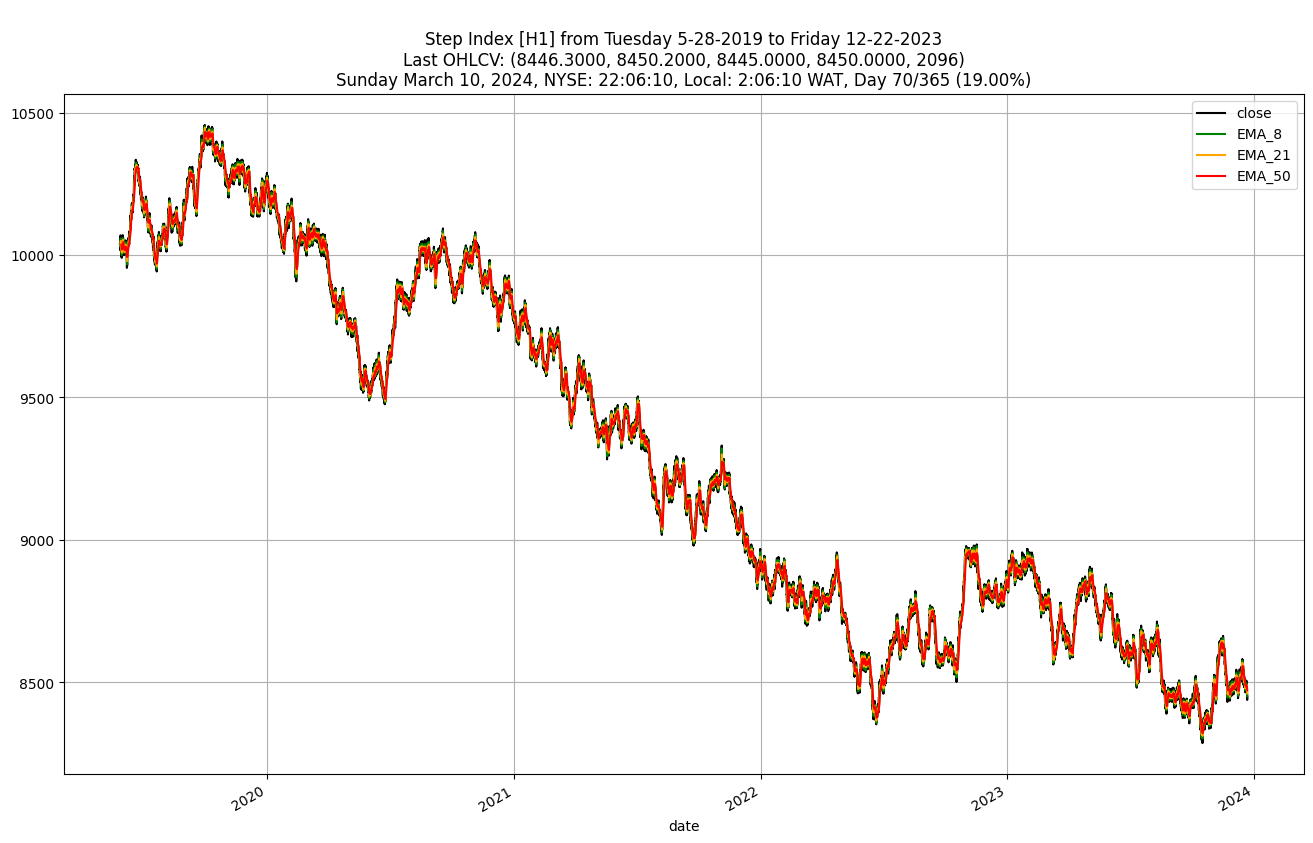

In [44]:
# chart = asset["close"] #asset[["close", "SMA_10", "SMA_20", "SMA_50", "SMA_200"]]
# chart = asset[["close", "SMA_10", "SMA_20"]]
chart = features_df[["close", "EMA_8", "EMA_21", "EMA_50"]]
chart.plot(figsize=(16, 10), color=colors("BkGrOrRd"), title=ptitle, grid=True)

#### Long and Short Trends

Trends are either a Trend (1) or No Trend (0) depending on the Trend passed into ***Trend Signals**

<Axes: xlabel='date'>

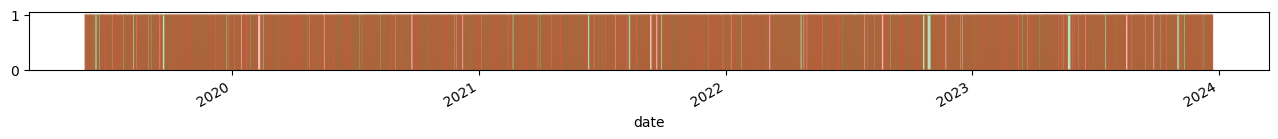

In [45]:
long_trend = trendy.TS_Trends
short_trend = 1 - long_trend

long_trend.plot(figsize=(16, 0.85), kind="area", stacked=True, color=colors()[0], alpha=0.25) # Green Area
short_trend.plot(figsize=(16, 0.85), kind="area", stacked=True, color=colors()[1], alpha=0.25) # Red Area

#### Trades or Trade Signals


The Trades are either Enter (1) or Exit (-1) or No Position/Action (0). These are based on the Trend passed into Trend Signals whether they are Long or Short Trends.

<Axes: xlabel='date'>

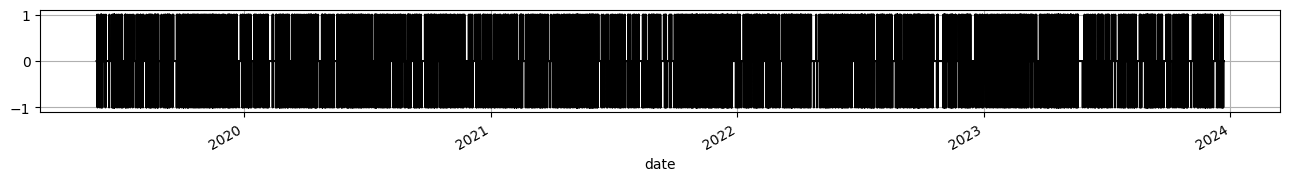

In [46]:
trendy.TS_Trades.plot(figsize=(16, 1.5), color=colors("BkBl")[0], grid=True)

#### Active Returns

Active Returns are returns made during the course of the Trend. They are simply the product of the returns and the Trend

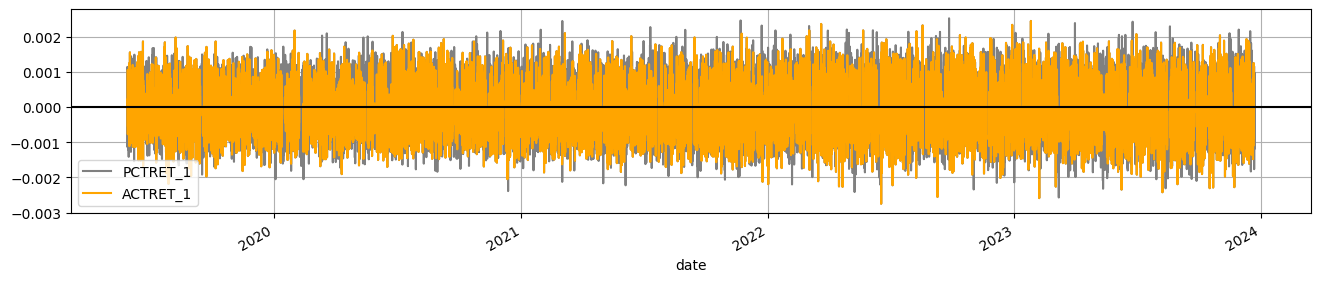

In [47]:
features_df["ACTRET_1"] = trendy.TS_Trends.shift(1) * features_df.PCTRET_1
features_df[["PCTRET_1", "ACTRET_1"]].plot(figsize=(16, 3), color=colors("GyOr"), alpha=1, grid=True).axhline(0, color="black")

#### Buy and Hold Returns (PCTRET_1) vs. Cum. Active Returns (ACTRET_1)

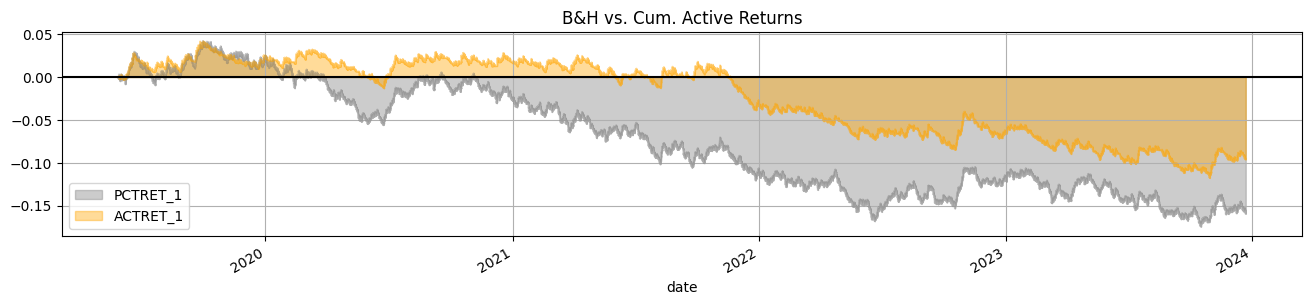

In [48]:
((features_df[["PCTRET_1", "ACTRET_1"]] + 1).cumprod() - 1).plot(figsize=(16, 3), kind="area", stacked=False, color=colors("GyOr"), title="B&H vs. Cum. Active Returns", alpha=.4, grid=True).axhline(0, color="black")

In [49]:
features_df

,open,high,low,close,tick_volume,MOM_10,RSI_14,TSI_13_25_13,TSIs_13_25_13,ER_10,...,CDL_THRUSTING,CDL_TRISTAR,CDL_UNIQUE3RIVER,CDL_UPSIDEGAP2CROWS,CDL_XSIDEGAP3METHODS,TS_Trends,TS_Trades,TS_Entries,TS_Exits,ACTRET_1
date,,,,,,,,,,,,,,,,,,,,,
2019-05-28 07:00:00,10040.1,10043.3,10038.0,10038.9,1597,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0,0,0,0,NaN
2019-05-28 08:00:00,10038.8,10040.5,10033.1,10036.9,3600,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0,0,0,0,-0.0
2019-05-28 09:00:00,10037.0,10048.0,10036.4,10041.9,3600,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0.0
2019-05-28 10:00:00,10042.0,10047.1,10039.9,10039.9,3600,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0,0,0,0,-0.0
2019-05-28 11:00:00,10040.0,10041.6,10029.8,10030.1,3600,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0,0,0,0,-0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-22 05:00:00,8452.7,8456.1,8446.2,8450.2,3600,-23.4,33.0,-25.821352,-16.851931,0.381107,...,0.0,0.0,0.0,0.0,0.0,0,0,0,0,-0.0
2023-12-22 06:00:00,8450.3,8452.9,8442.6,8446.8,3600,-36.6,31.0,-27.696818,-18.401201,0.665455,...,0.0,0.0,0.0,0.0,0.0,0,0,0,0,-0.0
2023-12-22 07:00:00,8446.9,8448.3,8438.2,8438.2,3600,-30.2,27.0,-30.643657,-20.150123,0.621399,...,0.0,0.0,0.0,0.0,0.0,0,0,0,0,-0.0


In [50]:
features_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 40056 entries, 2019-05-28 07:00:00 to 2023-12-22 09:00:00
Columns: 119 entries, open to ACTRET_1
dtypes: float64(111), int64(8)
memory usage: 36.7 MB


In [51]:
# stop

In [52]:
# features_df.reset_index(inplace=True)

# features_df

In [53]:
features_df.isna().sum()

open           0
high           0
low            0
close          0
tick_volume    0
              ..
TS_Trends      0
TS_Trades      0
TS_Entries     0
TS_Exits       0
ACTRET_1       1
Length: 119, dtype: int64

In [54]:
# cols = df.select_dtypes(include=['object'])
for col in features_df.columns.values:
    features_df[col] = features_df[col].fillna(features_df[col].mean())
    
# features_df.dropna(axis=0, inplace=True)
# https://stackoverflow.com/questions/58636087/tensorflow-valueerror-failed-to-convert-a-numpy-array-to-a-tensor-unsupporte

In [55]:
features_df.isna().sum()

open           0
high           0
low            0
close          0
tick_volume    0
              ..
TS_Trends      0
TS_Trades      0
TS_Entries     0
TS_Exits       0
ACTRET_1       0
Length: 119, dtype: int64

# Define Get Data Function

In [56]:
from typing import List 

def get_data(markets_target: list, data: List[pd.DataFrame]):
    result = []
    
    for i, value in enumerate(data):
        if "date" not in value.columns:
            value["date"] = value.index
            
        value["date"] = pd.to_datetime(value["date"], format='%Y-%m-%d %H:%M:%S')
        value.set_index("date", inplace=True)
        
        result.append({
            "name": markets_target[i],
            "data": value
        })
    
    return result

# Global Settings

horizon (int): The number of forward terms of the target time series to be estimated. Also called timestep or nb_per_bloc

In [57]:

# noramlize: MinMax | StandarScale | Normalizer_l1 | Normalizer_l2 
settings = dict({
                # "ticker_file": "tickers.csv",
                 "markets_target": [details[0].replace(" ", "_")],
                 "normalisation_fit_type": "StandarScale",
                 "normalisation_fit_target": "all",
                 "normalisation_target": "close",
                 "labelisation_disparity": 0.055, # 0.025, 0.045, 0.055, 0.065, 0.075, 0.085, 0.095, 0.1
                 "labelisation_features_name": ['open', 'high', 'low', 'close', 'volume'], # ["ask", "bid", "high", "low", "moy_prev_day"], 
                 "labelisation_labels_name": ["buy", "sell", "neutral"], # ["buy", "sell", "wait"] | ["strong buy", "buy", "strong sell", "sell", "neutral"]
                 "is_balance": True,
                 "split_train": 0.8,
                 "split_test": 0.2,
                 "nb_per_bloc": 4, # 50, 25 timestep | 4, 8, 16, 32, 64 -> i.e it can see 4, 8, 16, 32, 64 timesteps
                 "delta_neurons_numbers": 2, # delta {2-10}
                 "model_optimizer": "adam",
                 "model_loss": "categorical_crossentropy", # mse, categorical_crossentropy, sparse_categorical_crossentropy
                 "model_epoch": 60, # 50, 70, 100, 120, 150, 250
                 "model_batch_size": 16, # 50, 32, 25
                 "model_validation_split": 0.15,
                 "model_shuffle": False,
                 "model_evaluate_batch_size": 32 # 100, 64, 50
                })

LABEL_TARGET: str = settings["normalisation_target"]


# Define Normalization

This class apply logarithm and a normalization(MinMax | StandarScale | Normalizer_l1 | Normalizer_l2).

In [58]:

class Normalizer:
    """
        A class for normalizing market data while preserving the original data.
    """

    def __init__(self, data):
        """
            Initializes the Normalizer class with market data.

            Args:
                data (list[dict]): A list of dictionaries, where each dictionary represents a market
                                   with keys like "name" and "data" (containing market data).
        """
        self.__market_names = [e["name"] for e in data]
        self.__original_data = [e["data"] for e in data]  # TODO: Deep copy to preserve original data
        self.__normalized_data = None  # Stores normalized data after fit is called

    def __normalize(self, target, numerical_data, scaler_func):
        """
            Normalizes data using the provided scaler function for specific target markets.

            Args:
                target (str): The target market(s) to normalize ("all" or a list of market names).
                numerical_data (list[pd.DataFrame]): A list of DataFrames containing numerical data for each market.
                scaler_func (callable): A function that performs data scaling (e.g., MinMaxScaler.fit_transform).
        """
        normalized_markets = []
        if target == "all":
            for market in numerical_data:
                columns = market.columns
                market_scaled = scaler_func(market)
                market_scaled = pd.DataFrame(market_scaled, columns=columns)
                normalized_markets.append(market_scaled)
        else:
            for market_name, market in zip(self.__market_names, numerical_data):
                if market_name in target:
                    columns = market.columns
                    market_scaled = scaler_func(market)
                    market_scaled = pd.DataFrame(market_scaled, columns=columns)
                    normalized_markets.append(market_scaled)
                    
        return normalized_markets

    def fit(self, norm_type, features_list, target="all"):
        """
            Performs data normalization based on the specified type, features, and target market(s).

            Args:
                norm_type (str): The type of normalization to perform ("MinMax", "StandarScale", "Normalizer_l1", or "Normalizer_l2").
                features_list (list): A list of feature names to consider for normalization.
                target (str, optional): The target market(s) to normalize ("all" or a list of market names). Defaults to "all".

            Raises:
                ValueError: If an invalid normalization type is provided.
        """
        # Extract numerical data for the specified features
        numerical_data = [market[features_list]._get_numeric_data() for market in self.__original_data]

        if norm_type == "MinMax":
            print(f"Performing MinMax Normalization on {target}.")
            scaler_func = MinMaxScaler().fit_transform
            self.__normalized_data = self.__normalize(target, numerical_data, scaler_func)
        elif norm_type == "StandarScale":
            print(f"Performing StandarScale Normalization on {target}.")
            scaler_func = StandardScaler().fit_transform
            self.__normalized_data = self.__normalize(target, numerical_data, scaler_func)
        elif norm_type.startswith("Normalizer"):
            norm_value = norm_type.split("_")[-1]  # Extract l1 or l2 from "Normalizer_l1" or "Normalizer_l2"
            if norm_value not in ("l1", "l2"):
                raise ValueError("Invalid norm type for Normalizer. Must be 'l1' or 'l2'.")
            print(f"Performing Normalizer (norm={norm_value}) on {target}.")
            scaler_func = Normalizer(norm=norm_value).fit_transform
            self.__normalized_data = self.__normalize(target, numerical_data, scaler_func)
        else:
            raise ValueError(f"Invalid normalization type: {norm_type}")

    def get_normalized_data(self, idx: int = 0):
        """
            Returns the normalized data if normalization has been performed, otherwise raises an error.
            
            Args:
                idx (int): The location/index of the normalized data.

            Raises:
                RuntimeError: If data has not been normalized yet.
                IndexError: If the index is out of range.
        """
        if self.__normalized_data is None:
            raise RuntimeError("Data has not been normalized yet. Please call 'fit' first.")
        
        if idx < 0 or idx >= len(self.__normalized_data):
            raise IndexError("Index out of range.")
        
        if idx is None:
            return self.__normalized_data
        
        return self.__normalized_data[idx]

    def get_original_data(self):
        """
            Returns the original, un-normalized data.
        """
        return self.__original_data.copy



# Define PEAKS Detection 

This function detect peaks with a delta.

Choosing a default delta value for the peakdet function depends on the characteristics of your data and the desired level of peak/valley sensitivity. Here are some considerations:

- Data Scale: If your data values are on a large scale (e.g., stock prices in the thousands), a larger delta might be appropriate to avoid detecting insignificant fluctuations.
- Noise Level: If your data has a high level of noise, a larger delta might be necessary to filter out minor variations and focus on more prominent peaks and valleys.
- Desired Sensitivity: If you want to capture a broad range of peaks and valleys, a smaller delta would be suitable. However, this might also lead to detecting insignificant bumps or dips.
  
Here are some possible default values based on common scenarios:

- General Case: A reasonable starting point for many applications could be a delta value between 0.01 and 0.1. This range is a relative percentage of the data scale and can capture significant peaks and valleys without being overly sensitive to noise.
- Highly Scaled Data (e.g., Stock Prices): You might consider a delta between 1.0 and 10.0 for data with large values.
- Noisy Data: A delta between 0.05 and 0.2 could be a starting point for data with significant noise.

In [59]:

def peaks_detection(data: list[float], delta: float = 0.01, x: list[float] = None) -> tuple[np.ndarray, np.ndarray]:
    """
    Finds peaks and valleys in a data series.

    Args:
        data (list[float]): The data series.
        delta (float): The threshold for a peak or valley.
        x (list[float], optional): The x-axis values (optional). Defaults to None.

    Returns:
        tuple[np.ndarray, np.ndarray]: Two numpy arrays, the first containing the indices and values of the peaks,
               the second containing the indices and values of the valleys.
    """

    data_array = np.asarray(data)  # Ensure NumPy array for efficiency

    if x is None:
        x = np.arange(len(data_array))  # Create x-axis if not provided

    peaks: list[tuple[float, float]] = []
    valleys: list[tuple[float, float]] = []
    current_peak = np.inf
    current_valley = -np.inf
    peak_pos = np.nan
    valley_pos = np.nan
    looking_for_peak = True  # Flag to track search direction

    for i, this_value in enumerate(data_array):
        # Update current peak and valley values
        current_peak = max(current_peak, this_value)
        current_valley = min(current_valley, this_value)

        if looking_for_peak:
            if this_value < current_peak - delta:
                if not np.isnan(peak_pos):
                    peaks.append((x[int(peak_pos)], current_peak))
                # peaks.append((x[int(peak_pos)], current_peak))
                current_valley = this_value
                valley_pos = i
                looking_for_peak = False
        else:
            if this_value > current_valley + delta:
                if not np.isnan(valley_pos):
                    valleys.append((x[int(valley_pos)], current_valley))
                # valleys.append((x[int(valley_pos)], current_valley))
                current_peak = this_value
                peak_pos = i
                looking_for_peak = True

    return np.array(peaks), np.array(valleys)


# Define Frame labelization 

Currently: buy, sell, wait/neutral

update to: strong buy, buy, strong sell, sell, wait/neutral (can also use the prediction probability to determine this 
e.g when a buy is >=75%, it can indicate a strong buy)

can also rename wait to neutral 


In [60]:
class MarketLabeler:
    """
    A class for labeling market data with buy, sell, or neutral signals based on peak information.
    """

    def __init__(self, peaks_max, peaks_min):
        """
        Initializes the MarketLabeler with peak data.

        Args:
            peaks_max (list): A list of tuples representing peak maxima (index, value).
            peaks_min (list): A list of tuples representing peak minima (index, value).
        """
        self.peaks_max = peaks_max
        self.peaks_min = peaks_min

    def label_data(self, data):
        """
        Labels each data point with a buy, sell, or neutral signal based on peaks.

        Args:
            data (list): A list representing the market data (e.g., prices).

        Returns:
            list: A list of labels (0 for neutral, 1 for sell, 2 for buy) corresponding to each data point.
        """
        labels = []
        for i, _ in enumerate(data):  # Iterate through data indices
            if any(idx == i for idx, _ in self.peaks_min):
                labels.append(0)  # Buy signal if peak min
            elif any(idx == i for idx, _ in self.peaks_max):
                labels.append(1)  # Sell signal if peak max
            else:
                labels.append(2)  # Neutral otherwise
        return labels

    def label_dataframe(self, frame_base: pd.DataFrame, data_column: str = "close"):
        """
        Labels a DataFrame with buy, sell, and neutral columns based on peak information.

        Args:
            frame_base (pd.DataFrame): The DataFrame containing the market data.
            data_column (str, optional): The name of the column containing the data to be labeled. Defaults to "close".

        Returns:
            pd.DataFrame: The updated DataFrame with added "buy", "sell", and "neutral" columns.
        """
        if data_column not in frame_base.columns:
            raise ValueError(f"Data column '{data_column}' not found in the DataFrame.")

        labels = self.label_data(frame_base[data_column])
        
        frame_base["buy"] = [1 if label == 0 else 0 for label in labels]
        frame_base["sell"] = [1 if label == 1 else 0 for label in labels]
        frame_base["neutral"] = [1 if label == 2 else 0 for label in labels]
    
        return frame_base



# Define Data Generator

In [61]:

class DataGenerator:
    """
    A class that generates data for training and testing.

    Args:
        dataset (pd.DataFrame): The input dataset.
        timestep (int): The number of timesteps to consider for each sample.
        xcols (List[str]): The column names to be used as input features.
        ycols (List[str]): The column names to be used as output labels.

    Methods:
        generate_data: Generates the input-output pairs for training and testing.
        balance_labelization: Balances the label distribution by removing excess neutral labels.
        train_test_split: Splits the data into training and testing sets.

    """

    def __init__(self, dataset: pd.DataFrame, timestep: int, xcols: List[str], ycols: List[str]):
        self.dataset = dataset
        self.timestep = timestep
        self.xcols = xcols
        self.ycols = ycols

    def generate_data(self) -> Tuple[np.ndarray, np.ndarray]:
        """
        Generates the input-output pairs for training and testing.

        Returns:
            Tuple[np.ndarray, np.ndarray]: A tuple containing the input and output arrays.

        """
        dx = [np.array(self.dataset.iloc[i : i + self.timestep][self.xcols]) for i in range(len(self.dataset) - self.timestep)]
        dy = [self.dataset.iloc[i + self.timestep - 1][self.ycols] for i in range(len(self.dataset) - self.timestep)]
        return np.array(dx), np.array(dy)

    def balance_labelization(self, frame: np.ndarray, label: np.ndarray) -> Tuple[np.ndarray, np.ndarray]:
        """
        Balances the label distribution by removing excess neutral labels.

        Args:
            frame (np.ndarray): The input array.
            label (np.ndarray): The label array.

        Returns:
            Tuple[np.ndarray, np.ndarray]: A tuple containing the balanced input and label arrays.

        """
        neutral_indices = np.where(label[:, 2] == 1)[0]
        sell_indices = np.where(label[:, 1] == 1)[0]
        buy_indices = np.where(label[:, 0] == 1)[0]

        neutral_count = len(neutral_indices)
        sell_count = len(sell_indices)
        buy_count = len(buy_indices)

        need_delete = neutral_count - min(sell_count, buy_count)
        rand_delete = np.random.choice(neutral_indices, need_delete, replace=False)

        final_frame = np.delete(frame, rand_delete, axis=0)
        final_label = np.delete(label, rand_delete, axis=0)

        return final_frame, final_label

    def train_test_split(self, test_per: float, balance: bool = False) -> Tuple[np.ndarray, np.ndarray, np.ndarray, np.ndarray]:
        """
        Splits the data into training and testing sets.

        Args:
            test_per (float): The percentage of data to be used for testing.
            balance (bool, optional): Whether to balance the label distribution. Defaults to False.

        Returns:
            Tuple[np.ndarray, np.ndarray, np.ndarray, np.ndarray]: A tuple containing the training and testing input and label arrays.

        """
        x_tmp, y_tmp = self.generate_data()

        if balance:
            x_tmp, y_tmp = self.balance_labelization(x_tmp, y_tmp)

        x_train, x_test, y_train, y_test = train_test_split(x_tmp, y_tmp, test_size=test_per, random_state = 100, shuffle = settings['model_shuffle'])

        return x_train.astype(np.float32), y_train.astype(np.float32), x_test.astype(np.float32), y_test.astype(np.float32)


# Define Model Util functions (for Neural Nets)

In [62]:
def calculate_lstm_neurons(data_array: np.array, settings: dict) -> int:
    """
    Calculates the number of neurons for an LSTM network based on data and settings.

    Args:
        data_array (np.array): The numpy array containing the training data.
        settings (dict): A dictionary containing settings for neuron calculation.
            - labelisation_features_name (list): Names of features for training.
            - labelisation_labels_name (list): Names of output labels (classes).
            - delta_neurons_numbers (int): Hyperparameter scaling the number of neurons.

    Returns:
        int: The calculated number of neurons for the LSTM network.

    Raises:
        ValueError: If required keys are missing from the settings dictionary.
    """

    if not all(key in settings for key in ["labelisation_features_name", "labelisation_labels_name", "delta_neurons_numbers"]):
        raise ValueError("Missing required keys in 'settings' dictionary.")

    num_features = len(settings["labelisation_features_name"])
    num_labels = len(settings["labelisation_labels_name"])
    num_samples = data_array.shape[0]
    scaling_factor = settings["delta_neurons_numbers"]

    return int(num_samples / (scaling_factor * (num_features + num_labels)))



In [63]:

class PlotRealTime(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.i = 0
        self.x = []
        self.losses = []
        self.val_losses = []
        self.acc = []
        self.val_acc = []
        self.f1_score = []
        self.val_f1_score = []
        self.fig = plt.figure()
        self.logs = []

    def on_epoch_end(self, epoch, logs={}):

        self.logs.append(logs)
        self.x.append(self.i)
        
        self.acc.append(logs.get('accuracy'))
        self.val_acc.append(logs.get('val_accuracy'))
        
        self.f1_score.append(logs.get('fbeta_score'))
        self.val_f1_score.append(logs.get('val_fbeta_score'))
        
        self.losses.append(logs.get('loss'))
        self.val_losses.append(logs.get('val_loss'))
        
        self.i += 1
        clear_output(wait=True)
        
        plt.plot(self.x, self.acc, 'g', label="accuracy")
        plt.plot(self.x, self.val_acc, 'r', label="validation accuracy")
        plt.legend()
        plt.title("Accuracy percentage")
        plt.grid()
        plt.show()
        
        plt.plot(self.x, self.f1_score, 'g', label="f1_score")
        plt.plot(self.x, self.val_f1_score, 'r', label="validation f1_score")
        plt.legend()
        plt.title("F1 Score percentage")
        plt.grid()
        plt.show()
        
        plt.plot(self.x, self.losses, label="loss")
        plt.plot(self.x, self.val_losses, label="val_loss")
        plt.legend()
        plt.title("Losses percentage")
        plt.grid()
        plt.show()

# Get Data

If you have some troubles with 'get_data()' or 'tickers.csv', read the Notebook section in the README.md.

In [64]:
# GET DATA
# data = get_data(settings["ticker_file"], settings["markets_target"])
# data = get_data(settings["markets_target"], [df])
data = get_data(settings["markets_target"], [features_df])


In [65]:
data[0]["data"]

,open,high,low,close,tick_volume,MOM_10,RSI_14,TSI_13_25_13,TSIs_13_25_13,ER_10,...,CDL_THRUSTING,CDL_TRISTAR,CDL_UNIQUE3RIVER,CDL_UPSIDEGAP2CROWS,CDL_XSIDEGAP3METHODS,TS_Trends,TS_Trades,TS_Entries,TS_Exits,ACTRET_1
date,,,,,,,,,,,,,,,,,,,,,
2019-05-28 07:00:00,10040.1,10043.3,10038.0,10038.9,1597,-0.394796,49.558788,-0.872854,-0.866407,0.317017,...,0.0,0.0,0.0,0.0,0.0,0,0,0,0,-0.000002
2019-05-28 08:00:00,10038.8,10040.5,10033.1,10036.9,3600,-0.394796,49.558788,-0.872854,-0.866407,0.317017,...,0.0,0.0,0.0,0.0,0.0,0,0,0,0,-0.000000
2019-05-28 09:00:00,10037.0,10048.0,10036.4,10041.9,3600,-0.394796,49.558788,-0.872854,-0.866407,0.317017,...,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0.000000
2019-05-28 10:00:00,10042.0,10047.1,10039.9,10039.9,3600,-0.394796,49.558788,-0.872854,-0.866407,0.317017,...,0.0,0.0,0.0,0.0,0.0,0,0,0,0,-0.000000
2019-05-28 11:00:00,10040.0,10041.6,10029.8,10030.1,3600,-0.394796,49.558788,-0.872854,-0.866407,0.317017,...,0.0,0.0,0.0,0.0,0.0,0,0,0,0,-0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-22 05:00:00,8452.7,8456.1,8446.2,8450.2,3600,-23.400000,33.000000,-25.821352,-16.851931,0.381107,...,0.0,0.0,0.0,0.0,0.0,0,0,0,0,-0.000000
2023-12-22 06:00:00,8450.3,8452.9,8442.6,8446.8,3600,-36.600000,31.000000,-27.696818,-18.401201,0.665455,...,0.0,0.0,0.0,0.0,0.0,0,0,0,0,-0.000000
2023-12-22 07:00:00,8446.9,8448.3,8438.2,8438.2,3600,-30.200000,27.000000,-30.643657,-20.150123,0.621399,...,0.0,0.0,0.0,0.0,0.0,0,0,0,0,-0.000000


In [66]:
data[0]["data"].columns

Index(['open', 'high', 'low', 'close', 'tick_volume', 'MOM_10', 'RSI_14',
       'TSI_13_25_13', 'TSIs_13_25_13', 'ER_10',
       ...
       'CDL_THRUSTING', 'CDL_TRISTAR', 'CDL_UNIQUE3RIVER',
       'CDL_UPSIDEGAP2CROWS', 'CDL_XSIDEGAP3METHODS', 'TS_Trends', 'TS_Trades',
       'TS_Entries', 'TS_Exits', 'ACTRET_1'],
      dtype='object', length=119)

In [67]:
elements_to_remove = ['PCTRET_1', 'TS_Trends', 'TS_Trades', 'TS_Entries', 'TS_Exits', 'ACTRET_1']

# Use list comprehension for efficiency and readability
filtered_feature_cols = [element for element in data[0]["data"].columns if element not in elements_to_remove]

filtered_feature_cols, len(filtered_feature_cols)

(['open',
  'high',
  'low',
  'close',
  'tick_volume',
  'MOM_10',
  'RSI_14',
  'TSI_13_25_13',
  'TSIs_13_25_13',
  'ER_10',
  'FISHERT_9_1',
  'FISHERTs_9_1',
  'TRUERANGE_1',
  'RVI_14',
  'BBL_5_2.0',
  'BBM_5_2.0',
  'BBU_5_2.0',
  'BBB_5_2.0',
  'BBP_5_2.0',
  'PDIST',
  'SKEW_30',
  'KURT_30',
  'MAD_30',
  'ZS_30',
  'ENTP_10',
  'ADX_14',
  'DMP_14',
  'DMN_14',
  'DPO_20',
  'PSARl_0.02_0.2',
  'PSARs_0.02_0.2',
  'PSARaf_0.02_0.2',
  'PSARr_0.02_0.2',
  'QS_10',
  'LR_14',
  'SUPERT_7_3.0',
  'SUPERTd_7_3.0',
  'SUPERTl_7_3.0',
  'SUPERTs_7_3.0',
  'HILO_13_21',
  'HILOl_13_21',
  'HILOs_13_21',
  'HLC3',
  'OHLC4',
  'SMA_2',
  'SMA_10',
  'SMA_15',
  'SMA_60',
  'EMA_8',
  'EMA_21',
  'EMA_50',
  'CDL_2CROWS',
  'CDL_3BLACKCROWS',
  'CDL_3INSIDE',
  'CDL_3LINESTRIKE',
  'CDL_3OUTSIDE',
  'CDL_3STARSINSOUTH',
  'CDL_3WHITESOLDIERS',
  'CDL_ABANDONEDBABY',
  'CDL_ADVANCEBLOCK',
  'CDL_BELTHOLD',
  'CDL_BREAKAWAY',
  'CDL_CLOSINGMARUBOZU',
  'CDL_CONCEALBABYSWALL',
  'CDL_

In [68]:
settings["labelisation_features_name"] = filtered_feature_cols

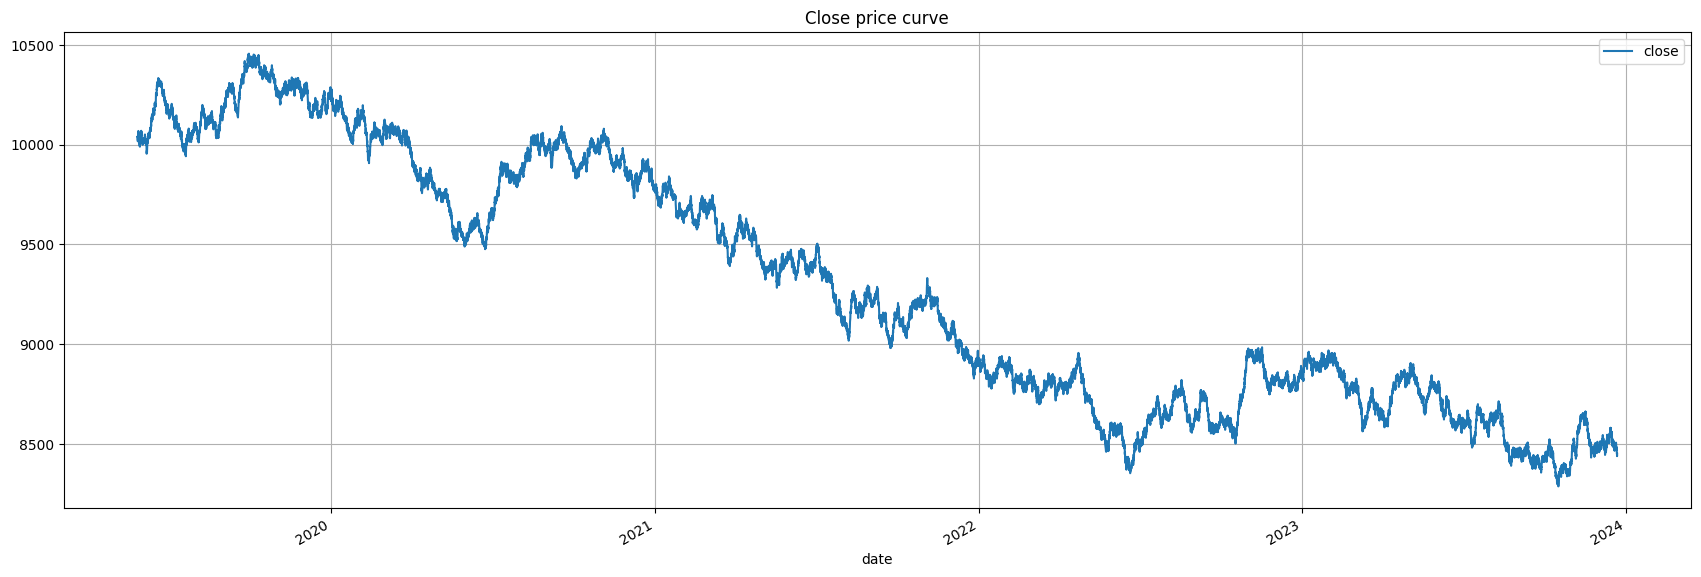

In [69]:

# # Display
# fig = plt.figure(figsize=(21,7))
# data["bid"].plot(label="bid", title="Bid curve")
# plt.grid()
# plt.legend()
# plt.show()

# Display
fig = plt.figure(figsize=(21,7))
data[0]["data"][LABEL_TARGET].plot(label=LABEL_TARGET, title=f"{LABEL_TARGET} Price curve".capitalize())
plt.grid()
plt.legend()
plt.show()

# Apply Nomalization

In [70]:
# NORMALIZATION OF THE DATA
norm = Normalizer(data)
norm.fit(settings["normalisation_fit_type"], settings["labelisation_features_name"], settings["normalisation_fit_target"])


Performing StandarScale Normalization on all.


In [71]:
normalize_data = norm.get_normalized_data()

normalize_data

,open,high,low,close,tick_volume,MOM_10,RSI_14,TSI_13_25_13,TSIs_13_25_13,ER_10,...,CDL_SPINNINGTOP,CDL_STALLEDPATTERN,CDL_STICKSANDWICH,CDL_TAKURI,CDL_TASUKIGAP,CDL_THRUSTING,CDL_TRISTAR,CDL_UNIQUE3RIVER,CDL_UPSIDEGAP2CROWS,CDL_XSIDEGAP3METHODS
0,1.207016,1.204590,1.211323,1.205131,-38.286619,0.000000,-6.100955e-16,0.000000,6.211699e-18,-2.474703e-16,...,0.000165,0.069943,-0.009994,-0.102567,0.0,0.032398,0.0,0.0,0.0,-0.00038
1,1.204914,1.200063,1.203401,1.201897,0.039220,0.000000,-6.100955e-16,0.000000,6.211699e-18,-2.474703e-16,...,0.000165,0.069943,-0.009994,-0.102567,0.0,0.032398,0.0,0.0,0.0,-0.00038
2,1.202004,1.212188,1.208736,1.209981,0.039220,0.000000,-6.100955e-16,0.000000,6.211699e-18,-2.474703e-16,...,0.000165,0.069943,-0.009994,-0.102567,0.0,0.032398,0.0,0.0,0.0,-0.00038
3,1.210087,1.210733,1.214395,1.206747,0.039220,0.000000,-6.100955e-16,0.000000,6.211699e-18,-2.474703e-16,...,0.000165,0.069943,-0.009994,-0.102567,0.0,0.032398,0.0,0.0,0.0,-0.00038
4,1.206854,1.201841,1.198066,1.190904,0.039220,0.000000,-6.100955e-16,0.000000,6.211699e-18,-2.474703e-16,...,0.000165,0.069943,-0.009994,-0.102567,0.0,0.032398,0.0,0.0,0.0,-0.00038
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40051,-1.359237,-1.361343,-1.362061,-1.363207,0.039220,-1.222728,-1.421792e+00,-1.267592,-8.943903e-01,2.857159e-01,...,-2.207455,0.069943,-0.009994,-0.102567,0.0,0.032398,0.0,0.0,0.0,-0.00038
40052,-1.363117,-1.366516,-1.367881,-1.368703,0.039220,-1.924309,-1.593519e+00,-1.362882,-9.810719e-01,1.553343e+00,...,0.000165,0.069943,-0.009994,-0.102567,0.0,0.032398,0.0,0.0,0.0,-0.00038
40053,-1.368614,-1.373953,-1.374994,-1.382606,0.039220,-1.584148,-1.936972e+00,-1.512606,-1.078924e+00,1.356943e+00,...,0.000165,0.069943,-0.009994,-0.102567,0.0,0.032398,0.0,0.0,0.0,-0.00038
40054,-1.382840,-1.371851,-1.375155,-1.369350,0.039220,-1.318398,-1.164202e+00,-1.501471,-1.161046e+00,6.826665e-01,...,0.000165,0.069943,-0.009994,-0.102567,0.0,0.032398,0.0,0.0,0.0,-0.00038


In [72]:
normalize_data.index

RangeIndex(start=0, stop=40056, step=1)

In [73]:
normalize_data

,open,high,low,close,tick_volume,MOM_10,RSI_14,TSI_13_25_13,TSIs_13_25_13,ER_10,...,CDL_SPINNINGTOP,CDL_STALLEDPATTERN,CDL_STICKSANDWICH,CDL_TAKURI,CDL_TASUKIGAP,CDL_THRUSTING,CDL_TRISTAR,CDL_UNIQUE3RIVER,CDL_UPSIDEGAP2CROWS,CDL_XSIDEGAP3METHODS
0,1.207016,1.204590,1.211323,1.205131,-38.286619,0.000000,-6.100955e-16,0.000000,6.211699e-18,-2.474703e-16,...,0.000165,0.069943,-0.009994,-0.102567,0.0,0.032398,0.0,0.0,0.0,-0.00038
1,1.204914,1.200063,1.203401,1.201897,0.039220,0.000000,-6.100955e-16,0.000000,6.211699e-18,-2.474703e-16,...,0.000165,0.069943,-0.009994,-0.102567,0.0,0.032398,0.0,0.0,0.0,-0.00038
2,1.202004,1.212188,1.208736,1.209981,0.039220,0.000000,-6.100955e-16,0.000000,6.211699e-18,-2.474703e-16,...,0.000165,0.069943,-0.009994,-0.102567,0.0,0.032398,0.0,0.0,0.0,-0.00038
3,1.210087,1.210733,1.214395,1.206747,0.039220,0.000000,-6.100955e-16,0.000000,6.211699e-18,-2.474703e-16,...,0.000165,0.069943,-0.009994,-0.102567,0.0,0.032398,0.0,0.0,0.0,-0.00038
4,1.206854,1.201841,1.198066,1.190904,0.039220,0.000000,-6.100955e-16,0.000000,6.211699e-18,-2.474703e-16,...,0.000165,0.069943,-0.009994,-0.102567,0.0,0.032398,0.0,0.0,0.0,-0.00038
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40051,-1.359237,-1.361343,-1.362061,-1.363207,0.039220,-1.222728,-1.421792e+00,-1.267592,-8.943903e-01,2.857159e-01,...,-2.207455,0.069943,-0.009994,-0.102567,0.0,0.032398,0.0,0.0,0.0,-0.00038
40052,-1.363117,-1.366516,-1.367881,-1.368703,0.039220,-1.924309,-1.593519e+00,-1.362882,-9.810719e-01,1.553343e+00,...,0.000165,0.069943,-0.009994,-0.102567,0.0,0.032398,0.0,0.0,0.0,-0.00038
40053,-1.368614,-1.373953,-1.374994,-1.382606,0.039220,-1.584148,-1.936972e+00,-1.512606,-1.078924e+00,1.356943e+00,...,0.000165,0.069943,-0.009994,-0.102567,0.0,0.032398,0.0,0.0,0.0,-0.00038
40054,-1.382840,-1.371851,-1.375155,-1.369350,0.039220,-1.318398,-1.164202e+00,-1.501471,-1.161046e+00,6.826665e-01,...,0.000165,0.069943,-0.009994,-0.102567,0.0,0.032398,0.0,0.0,0.0,-0.00038


# Apply PEAKS DETECTION

In [74]:

peaks_max, peaks_min = peaks_detection(normalize_data[settings["normalisation_target"]], settings["labelisation_disparity"])


In [75]:
np.mean(peaks_max.flatten())

9997.510824439269

In [76]:
np.median(peaks_max.flatten())

10.440036496396

In [77]:
np.mean(peaks_min.flatten())

9973.645323240233

In [78]:
np.median(peaks_min.flatten())

1.7835602782674957

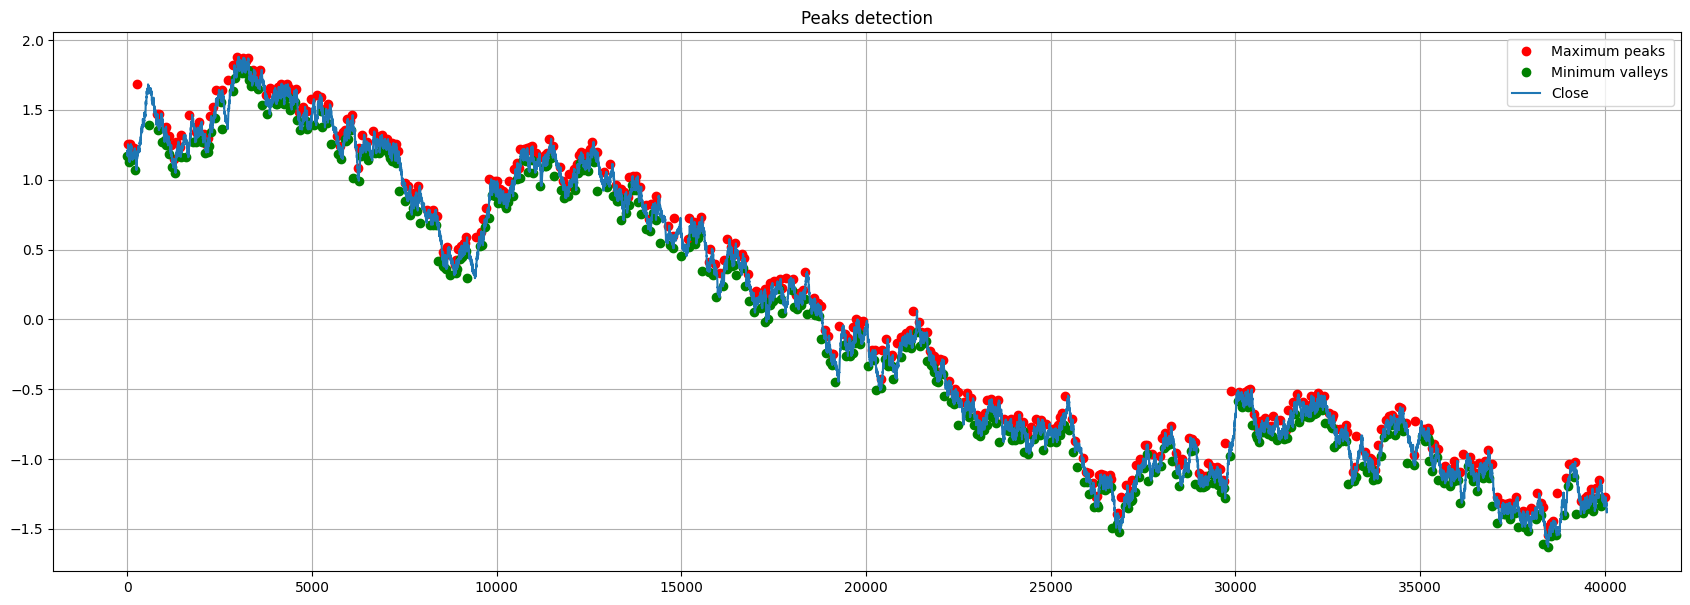

In [79]:
# Display peaks
fig = plt.figure(figsize=(21, 7))
plt.plot(peaks_max[:,0], peaks_max[:, 1], 'ro', label="Maximum peaks")
plt.plot(peaks_min[:,0], peaks_min[:, 1], 'go', label="Minimum valleys")
plt.plot(normalize_data[LABEL_TARGET], label=LABEL_TARGET.capitalize())
plt.grid()
plt.title("Peaks detection")
plt.legend()
plt.show()

# Apply Frame labelization

LABELIZATION WITH PEAKS

In [80]:
%%time
# Assuming your DataFrame has a column named "prices" for market data
# data[0]["data"]
labeler = MarketLabeler(peaks_max, peaks_min)
labeled_normalize_df = labeler.label_dataframe(normalize_data, LABEL_TARGET)

CPU times: user 54.9 s, sys: 7.2 ms, total: 54.9 s
Wall time: 55.2 s


In [81]:
labeled_normalize_df

,open,high,low,close,tick_volume,MOM_10,RSI_14,TSI_13_25_13,TSIs_13_25_13,ER_10,...,CDL_TAKURI,CDL_TASUKIGAP,CDL_THRUSTING,CDL_TRISTAR,CDL_UNIQUE3RIVER,CDL_UPSIDEGAP2CROWS,CDL_XSIDEGAP3METHODS,buy,sell,neutral
0,1.207016,1.204590,1.211323,1.205131,-38.286619,0.000000,-6.100955e-16,0.000000,6.211699e-18,-2.474703e-16,...,-0.102567,0.0,0.032398,0.0,0.0,0.0,-0.00038,1,0,0
1,1.204914,1.200063,1.203401,1.201897,0.039220,0.000000,-6.100955e-16,0.000000,6.211699e-18,-2.474703e-16,...,-0.102567,0.0,0.032398,0.0,0.0,0.0,-0.00038,0,0,1
2,1.202004,1.212188,1.208736,1.209981,0.039220,0.000000,-6.100955e-16,0.000000,6.211699e-18,-2.474703e-16,...,-0.102567,0.0,0.032398,0.0,0.0,0.0,-0.00038,0,0,1
3,1.210087,1.210733,1.214395,1.206747,0.039220,0.000000,-6.100955e-16,0.000000,6.211699e-18,-2.474703e-16,...,-0.102567,0.0,0.032398,0.0,0.0,0.0,-0.00038,0,0,1
4,1.206854,1.201841,1.198066,1.190904,0.039220,0.000000,-6.100955e-16,0.000000,6.211699e-18,-2.474703e-16,...,-0.102567,0.0,0.032398,0.0,0.0,0.0,-0.00038,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40051,-1.359237,-1.361343,-1.362061,-1.363207,0.039220,-1.222728,-1.421792e+00,-1.267592,-8.943903e-01,2.857159e-01,...,-0.102567,0.0,0.032398,0.0,0.0,0.0,-0.00038,0,0,1
40052,-1.363117,-1.366516,-1.367881,-1.368703,0.039220,-1.924309,-1.593519e+00,-1.362882,-9.810719e-01,1.553343e+00,...,-0.102567,0.0,0.032398,0.0,0.0,0.0,-0.00038,0,0,1
40053,-1.368614,-1.373953,-1.374994,-1.382606,0.039220,-1.584148,-1.936972e+00,-1.512606,-1.078924e+00,1.356943e+00,...,-0.102567,0.0,0.032398,0.0,0.0,0.0,-0.00038,0,0,1
40054,-1.382840,-1.371851,-1.375155,-1.369350,0.039220,-1.318398,-1.164202e+00,-1.501471,-1.161046e+00,6.826665e-01,...,-0.102567,0.0,0.032398,0.0,0.0,0.0,-0.00038,0,0,1


# Apply Data Generator - Split Normalized Data

horizon (int): The number of forward terms of the target time series to be estimated

In [82]:
data_generator = DataGenerator(labeled_normalize_df, settings["nb_per_bloc"], settings["labelisation_features_name"], settings["labelisation_labels_name"])


In [83]:
%%time
x_train, y_train, x_test, y_test = data_generator.train_test_split(settings["split_test"], settings["is_balance"])


CPU times: user 1min 6s, sys: 396 ms, total: 1min 6s
Wall time: 1min 7s


In [84]:
x_train.shape, y_train.shape


((1052, 4, 113), (1052, 3))

In [85]:
x_train.dtype, y_train.dtype


(dtype('float32'), dtype('float32'))

In [86]:
y_train[0]

array([0., 1., 0.], dtype=float32)

# Model Experiments

In [87]:
from keras.layers import Input, Dense, Dropout, Bidirectional, Reshape
from keras.callbacks import EarlyStopping
from keras.metrics import F1Score, FBetaScore, Precision, Recall 
from tcn import TCN, tcn_full_summary
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_auc_score


## Definition 

In [88]:
# https://stackoverflow.com/questions/40761185/what-is-the-intuition-of-using-tanh-in-lstm
# x_tcn = GlobalAveragePooling1D()(x_tcn)
 
# SET NUMBER OF NEURONS
settings["model_neural"] = calculate_lstm_neurons(x_train, settings)  
settings["model_neural_hidden"] =  settings["model_neural"] + int(settings["model_neural"] / 2) # int(settings["model_neural"] / 2)

settings["model_neural"], settings["model_neural_hidden"]

(4, 6)

### Model A (Bi-LSTM)

In [89]:
model_a = Sequential()
model_a.add(Input(shape=(x_train.shape[1], x_train.shape[2])))

model_a.add(Bidirectional(LSTM(settings["model_neural"], activation='tanh', return_sequences=True)))
model_a.add(Bidirectional(LSTM(settings["model_neural_hidden"], activation='tanh', return_sequences=True)))  
model_a.add(Dropout(0.2))
model_a.add(Bidirectional(LSTM(settings["model_neural_hidden"], activation='tanh', return_sequences=True)))  
model_a.add(Bidirectional(LSTM(settings["model_neural"], activation='tanh')))  
# model_a.add(LSTM(settings["model_neural_hidden"], activation='tanh'))
model_a.add(Dense(y_train.shape[1], activation='softmax'))

model_a.compile(optimizer=settings["model_optimizer"], loss=settings["model_loss"], metrics=['accuracy', FBetaScore(), Precision(), Recall()])

model_a.summary()

2024-03-10 02:08:29.646690: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-03-10 02:08:29.647878: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2256] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional (Bidirection  (None, 4, 8)              3776      
 al)                                                             
                                                                 
 bidirectional_1 (Bidirecti  (None, 4, 12)             720       
 onal)                                                           
                                                                 
 dropout (Dropout)           (None, 4, 12)             0         
                                                                 
 bidirectional_2 (Bidirecti  (None, 4, 12)             912       
 onal)                                                           
                                                                 
 bidirectional_3 (Bidirecti  (None, 8)                 544       
 onal)                                                  

### Model B (TCN)

In [90]:
model_b = Sequential()
model_b.add(Input(shape=(x_train.shape[1], x_train.shape[2])))

model_b.add(TCN(nb_filters=32, kernel_size=3, activation='tanh', return_sequences=True))
model_b.add(TCN(nb_filters=16, kernel_size=3, dropout_rate=0.05, activation='tanh', go_backwards=False, return_sequences=True)) 
model_b.add(Dropout(0.1))
model_b.add(TCN(nb_filters=8, kernel_size=3, dropout_rate=0.05, activation='tanh', go_backwards=True, return_sequences=True)) 
model_b.add(TCN(nb_filters=16, kernel_size=6, activation='tanh', go_backwards=True, return_sequences=True))
model_b.add(TCN(nb_filters=8, kernel_size=2, dropout_rate=0, activation='tanh'))
# model_b.add(LSTM(settings["model_lstm_neural_hidden"], activation='tanh')) # relu
model_b.add(Dense(y_train.shape[1], activation='softmax'))

model_b.compile(optimizer=settings["model_optimizer"], loss=settings["model_loss"], metrics=['accuracy', FBetaScore(), Precision(), Recall()])

model_b.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 tcn (TCN)                   (None, 4, 32)             48672     
                                                                 
 tcn_1 (TCN)                 (None, 4, 16)             10704     
                                                                 
 dropout_1 (Dropout)         (None, 4, 16)             0         
                                                                 
 tcn_2 (TCN)                 (None, 4, 8)              2728      
                                                                 
 tcn_3 (TCN)                 (None, 4, 16)             18000     
                                                                 
 tcn_4 (TCN)                 (None, 8)                 1896      
                                                                 
 dense_1 (Dense)             (None, 3)                

### Model C (Bi-TCN)

In [91]:
model_c = Sequential()
model_c.add(Input(shape=(x_train.shape[1], x_train.shape[2])))

model_c.add(Bidirectional(TCN(nb_filters=settings["model_neural"], activation='tanh', padding='causal', return_sequences=True)))
model_c.add(Bidirectional(TCN(nb_filters=32, kernel_size=3, dropout_rate=0.05, activation='tanh', go_backwards=True, return_sequences=True))) 
model_c.add(Bidirectional(TCN(nb_filters=16, kernel_size=3, dropout_rate=0.10, activation='tanh', go_backwards=True, return_sequences=True))) 
# model_a.add(Dropout(0.2))
model_c.add(Bidirectional(TCN(nb_filters=32, kernel_size=3, dropout_rate=0.05, activation='tanh', go_backwards=True, return_sequences=True)))
model_c.add(Bidirectional(TCN(nb_filters=8, kernel_size=3, dropout_rate=0.05, activation='tanh')))
# model_c.add(LSTM(settings["model_lstm_neural_hidden"], activation='tanh')) # relu
model_c.add(Dense(y_train.shape[1], activation='softmax'))

model_c.compile(optimizer=settings["model_optimizer"], loss=settings["model_loss"], metrics=['accuracy', FBetaScore(), Precision(), Recall()])

model_c.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_4 (Bidirecti  (None, 4, 8)              4776      
 onal)                                                           
                                                                 
 bidirectional_5 (Bidirecti  (None, 4, 64)             70464     
 onal)                                                           
                                                                 
 bidirectional_6 (Bidirecti  (None, 4, 32)             25504     
 onal)                                                           
                                                                 
 bidirectional_7 (Bidirecti  (None, 4, 64)             74496     
 onal)                                                           
                                                                 
 bidirectional_8 (Bidirecti  (None, 16)               

### Model D (GRU)

In [92]:
model_d = Sequential()
model_d.add(Input(shape=(x_train.shape[1], x_train.shape[2])))

model_d.add(GRU(settings["model_neural"], activation='tanh', return_sequences=True))
model_d.add(GRU(settings["model_neural_hidden"], activation='tanh', return_sequences=True)) 
model_d.add(Dropout(0.2))
model_d.add(GRU(settings["model_neural_hidden"], activation='tanh', return_sequences=True))  
model_d.add(GRU(settings["model_neural"], activation='tanh'))  
# model_d.add(GRU(settings["model_neural_hidden"], activation='tanh'))
model_d.add(Dense(y_train.shape[1], activation='softmax'))

model_d.compile(optimizer=settings["model_optimizer"], loss=settings["model_loss"], metrics=['accuracy', FBetaScore(), Precision(), Recall()])

model_d.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 4, 4)              1428      
                                                                 
 gru_1 (GRU)                 (None, 4, 6)              216       
                                                                 
 dropout_2 (Dropout)         (None, 4, 6)              0         
                                                                 
 gru_2 (GRU)                 (None, 4, 6)              252       
                                                                 
 gru_3 (GRU)                 (None, 4)                 144       
                                                                 
 dense_3 (Dense)             (None, 3)                 15        
                                                                 
Total params: 2055 (8.03 KB)
Trainable params: 2055 (8

### Model E (Bi-GRU)

In [93]:
model_e = Sequential()
model_e.add(Input(shape=(x_train.shape[1], x_train.shape[2])))

model_e.add(Bidirectional(GRU(settings["model_neural"], activation='tanh', return_sequences=True)))
model_e.add(Bidirectional(GRU(settings["model_neural_hidden"], activation='tanh', return_sequences=True)))  
model_e.add(Dropout(0.2))
model_e.add(Bidirectional(GRU(settings["model_neural_hidden"], activation='tanh', return_sequences=True)))  
model_e.add(Bidirectional(GRU(settings["model_neural"], activation='tanh')))  
# model_e.add(GRU(settings["model_neural_hidden"], activation='tanh'))
model_e.add(Dense(y_train.shape[1], activation='softmax'))

model_e.compile(optimizer=settings["model_optimizer"], loss=settings["model_loss"], metrics=['accuracy', FBetaScore(), Precision(), Recall()])

model_e.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_9 (Bidirecti  (None, 4, 8)              2856      
 onal)                                                           
                                                                 
 bidirectional_10 (Bidirect  (None, 4, 12)             576       
 ional)                                                          
                                                                 
 dropout_3 (Dropout)         (None, 4, 12)             0         
                                                                 
 bidirectional_11 (Bidirect  (None, 4, 12)             720       
 ional)                                                          
                                                                 
 bidirectional_12 (Bidirect  (None, 8)                 432       
 ional)                                               

## Training

In [94]:
# y_train = y_train.astype(np.int64)
# y_train.dtype

In [95]:
# 

# X_train = tensorflow.convert_to_tensor(x_train, dtype=tensorflow.float32)
# y_train = tensorflow.convert_to_tensor(y_train, dtype=tensorflow.int64)

# X_test = tensorflow.convert_to_tensor(x_test, dtype=tensorflow.float32)
# y_test = tensorflow.convert_to_tensor(y_test, dtype=tensorflow.int64)

# Usage example (assuming model, X_train, y_train, X_val, and y_val are defined)
# plotter = PlotRealTime()
# history = model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val), callbacks=[plotter])

In [96]:
# X_train.dtype, y_train.dtype

In [97]:
# Plot real-time
plotRT = PlotRealTime()

# Learning stats
def lr(epoch):
    if epoch < 15:
        return 0.0001 # 0.010
    if epoch < 40:
        return 0.0095
    if epoch < 55:
        return 0.008
    if epoch < 60:
        return 0.007
    if epoch < 150:
        return 0.0001 # 0.01
    
    return 0.0001

def lr2(epoch):
    if epoch < 100:
        return 1e-8
    
    return 1e-4


# Define early stopping callback
patience = 25
early_stopping = EarlyStopping(monitor='val_loss', patience=patience, restore_best_weights=True)


### Model A

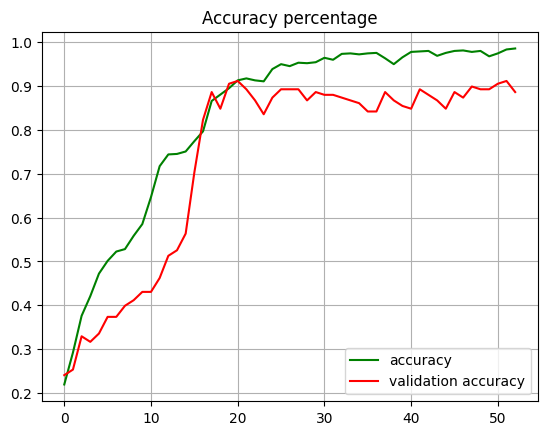

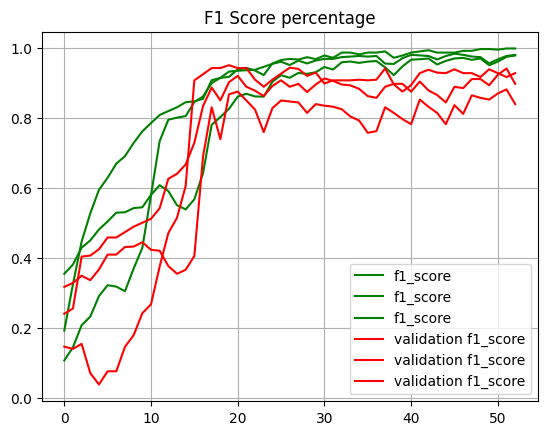

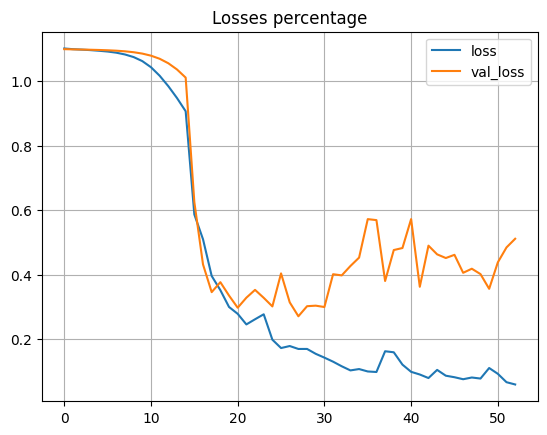

56/56 [==============================] - 2s 32ms/step - loss: 0.0594 - accuracy: 0.9855 - fbeta_score: 0.9855 - precision: 0.9855 - recall: 0.9855 - val_loss: 0.5115 - val_accuracy: 0.8861 - val_fbeta_score: 0.8881 - val_precision: 0.8861 - val_recall: 0.8861 - lr: 0.0080
CPU times: user 2min 47s, sys: 18.8 s, total: 3min 5s
Wall time: 1min 57s


In [98]:
%%time
hist_a = model_a.fit(x_train,
                 y_train, 
                 epochs=settings["model_epoch"],
                 batch_size=settings["model_batch_size"],
                 validation_split=settings["model_validation_split"],
                 verbose=1,
                 shuffle=settings["model_shuffle"],
                 callbacks=[plotRT, early_stopping, LearningRateScheduler(lr, verbose=1)])

In [99]:
model_a.save(f"../models/{file_name}_model_a_{time.time()}.h5")

/home/fortesenselabs/anaconda3/envs/python39/lib/python3.9/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


### Model B

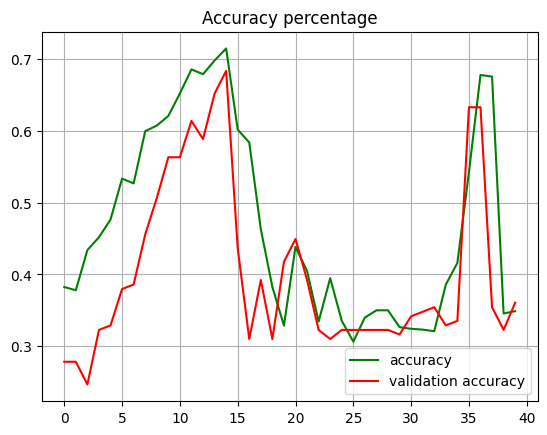

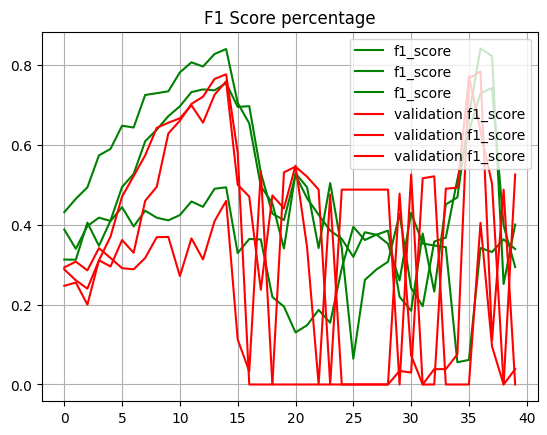

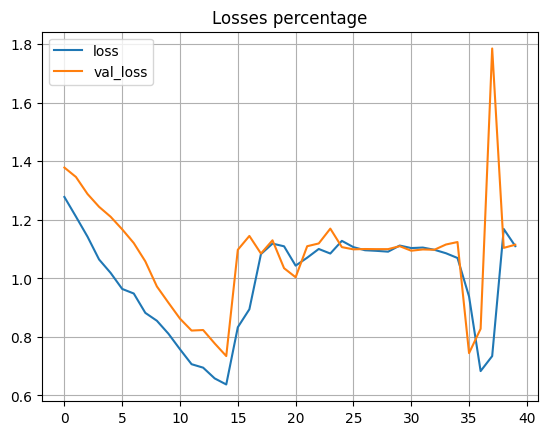

56/56 [==============================] - 3s 49ms/step - loss: 1.1103 - accuracy: 0.3490 - fbeta_score: 0.3447 - precision_1: 0.4085 - recall_1: 0.0324 - val_loss: 1.1150 - val_accuracy: 0.3608 - val_fbeta_score: 0.1881 - val_precision_1: 0.0000e+00 - val_recall_1: 0.0000e+00 - lr: 0.0095
CPU times: user 3min 15s, sys: 14.9 s, total: 3min 30s
Wall time: 3min 39s


In [100]:
%%time
hist_b = model_b.fit(x_train,
                 y_train, 
                 epochs= settings["model_epoch"],
                 batch_size=settings["model_batch_size"],
                 validation_split=settings["model_validation_split"],
                 verbose=1,
                 shuffle=settings["model_shuffle"],
                 callbacks=[plotRT, early_stopping, LearningRateScheduler(lr, verbose=1)])

In [101]:
model_b.save(f"../models/{file_name}_model_b_{time.time()}.h5")

### Model C

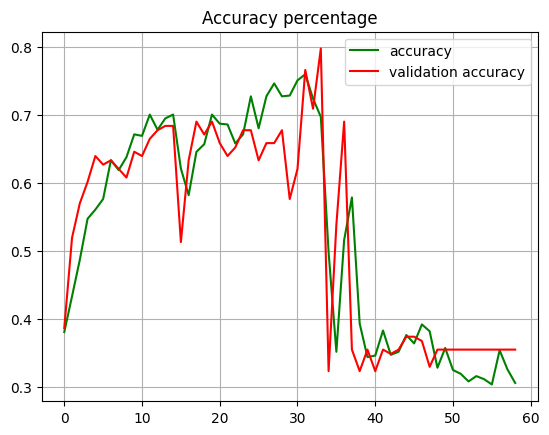

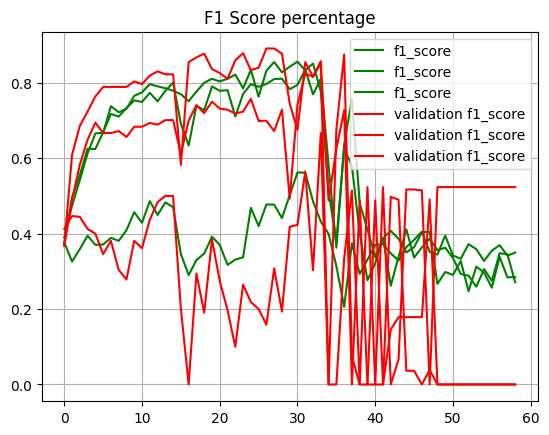

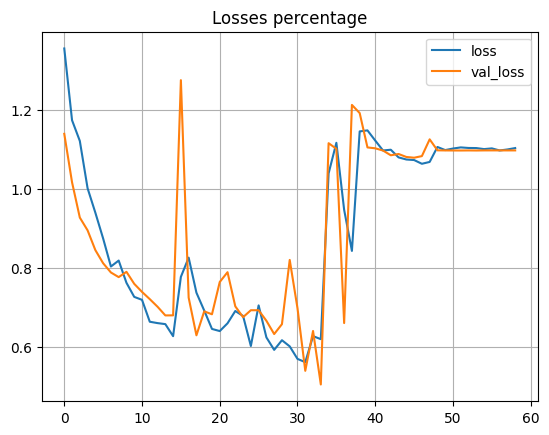

56/56 [==============================] - 7s 123ms/step - loss: 1.1040 - accuracy: 0.3054 - fbeta_score: 0.3018 - precision_2: 0.0000e+00 - recall_2: 0.0000e+00 - val_loss: 1.0981 - val_accuracy: 0.3544 - val_fbeta_score: 0.1745 - val_precision_2: 0.0000e+00 - val_recall_2: 0.0000e+00 - lr: 0.0070
CPU times: user 7min 44s, sys: 27.1 s, total: 8min 11s
Wall time: 5min 55s


In [102]:
%%time
hist_c = model_c.fit(x_train,
                 y_train, 
                 epochs=settings["model_epoch"],
                 batch_size=settings["model_batch_size"],
                 validation_split=settings["model_validation_split"],
                 verbose=1,
                 shuffle=settings["model_shuffle"],
                 callbacks=[plotRT, early_stopping, LearningRateScheduler(lr, verbose=1)])

In [103]:
model_c.save(f"../models/{file_name}_model_c_{time.time()}.h5")

### Model D

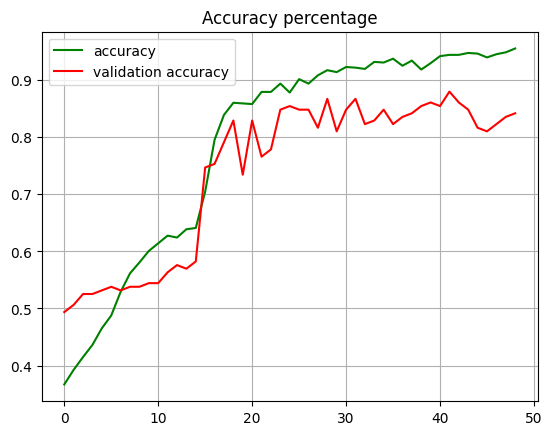

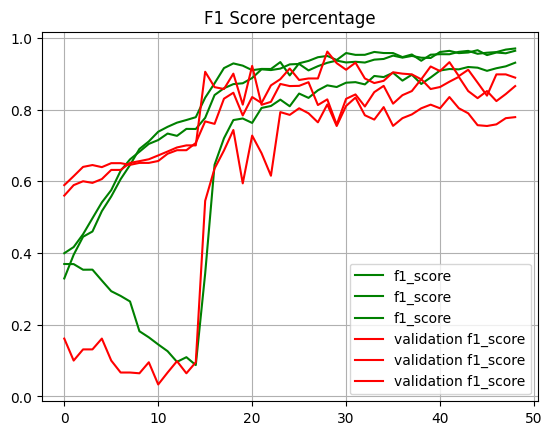

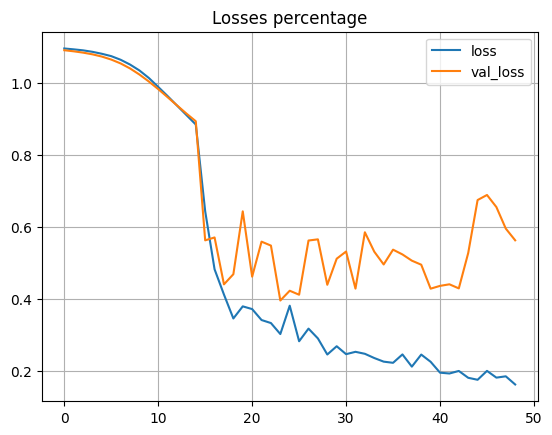

56/56 [==============================] - 3s 53ms/step - loss: 0.1619 - accuracy: 0.9553 - fbeta_score: 0.9549 - precision_3: 0.9553 - recall_3: 0.9553 - val_loss: 0.5627 - val_accuracy: 0.8418 - val_fbeta_score: 0.8443 - val_precision_3: 0.8418 - val_recall_3: 0.8418 - lr: 0.0080
CPU times: user 2min 13s, sys: 13.8 s, total: 2min 27s
Wall time: 2min 8s


In [104]:
%%time
hist_d = model_d.fit(x_train,
                 y_train, 
                 epochs=settings["model_epoch"],
                 batch_size=settings["model_batch_size"],
                 validation_split=settings["model_validation_split"],
                 verbose=1,
                 shuffle=settings["model_shuffle"],
                 callbacks=[plotRT, early_stopping, LearningRateScheduler(lr, verbose=1)])

In [105]:
model_d.save(f"../models/{file_name}_model_d_{time.time()}.h5")

### Model E

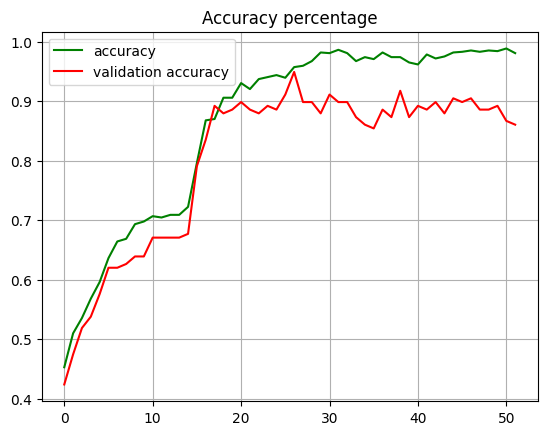

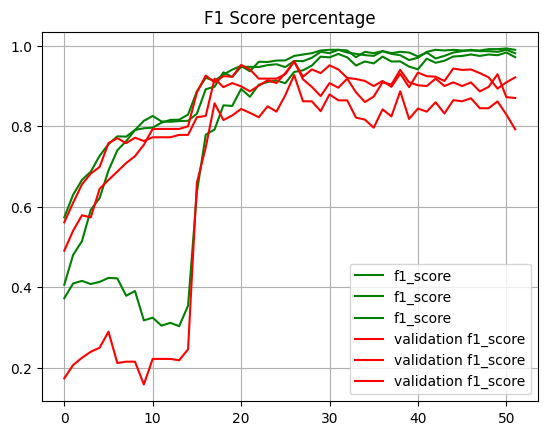

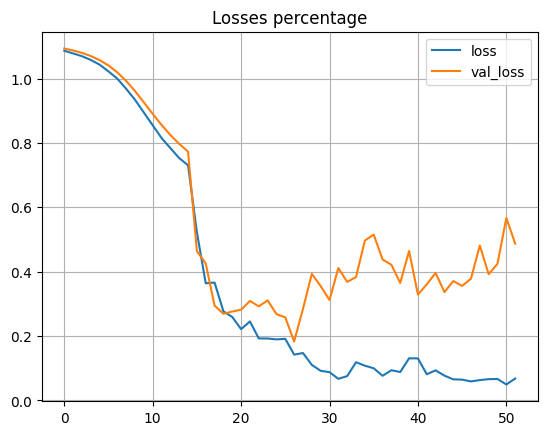

56/56 [==============================] - 2s 35ms/step - loss: 0.0681 - accuracy: 0.9810 - fbeta_score: 0.9810 - precision_4: 0.9810 - recall_4: 0.9810 - val_loss: 0.4872 - val_accuracy: 0.8608 - val_fbeta_score: 0.8615 - val_precision_4: 0.8608 - val_recall_4: 0.8608 - lr: 0.0080
CPU times: user 3min 6s, sys: 16.9 s, total: 3min 23s
Wall time: 2min 29s


In [106]:
%%time
hist_e = model_e.fit(x_train,
                 y_train, 
                 epochs=settings["model_epoch"],
                 batch_size=settings["model_batch_size"],
                 validation_split=settings["model_validation_split"],
                 verbose=1,
                 shuffle=settings["model_shuffle"],
                 callbacks=[plotRT, early_stopping, LearningRateScheduler(lr, verbose=1)])

In [107]:
model_e.save(f"../models/{file_name}_model_e_{time.time()}.h5")

## Evaluate

np.argmax(y_test, axis=1) => {0: 'BUY', '1': 'SELL', 2: 'NEUTRAL'}

In [108]:
# ['accuracy', FBetaScore(), Precision(), Recall()]
# np.argmax(y_test, axis=1) => {0: 'BUY', '1': 'SELL', 2: 'NEUTRAL'}
# label_map = {0: 'BUY', 1: 'SELL', 2: 'NEUTRAL'}

In [109]:

def plot_confusion_matrix(x_test, y_test, model, label_map: dict = {0: 'BUY', 1: 'SELL', 2: 'NEUTRAL'}):
    model_predictions = model.predict(x_test, batch_size=settings["model_evaluate_batch_size"], verbose=1)
    cm = confusion_matrix(np.argmax(y_test, axis=1), np.argmax(model_predictions, axis=1))
    print(cm)

    # map the numerical values to labels
    # cm_labels = [[label_map[j] for j in i] for i in cm]
    plt.figure(figsize=(10, 8))
    ax = plt.subplot()
    sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

    # labels, title and ticks
    ax.set_xlabel('Predicted labels') 
    ax.set_ylabel('Actual labels') 
    ax.set_title('Confusion Matrix') 
    
    # set tick labels based on label_map 
    labels = list(label_map.values())
    ax.xaxis.set_ticklabels(labels)
    ax.yaxis.set_ticklabels(labels)
    plt.show()


In [110]:
# ROC curev

def plot_roc_curve(x_test, y_test, model):
    # Binarize the output
    y_test_bin = label_binarize(y_test, classes=[0, 1, 2])
    n_classes = y_test_bin.shape[1]
    
    model_predictions = model.predict(x_test, batch_size=settings["model_evaluate_batch_size"], verbose=1)
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], model_predictions[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Compute micro-average ROC curve and ROC area
    fpr["micro"], tpr["micro"], _ = roc_curve(y_test_bin.ravel(), model_predictions.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

    # Compute macro-average ROC curve and ROC area

    # First aggregate all false positive rates
    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

    # Then interpolate all ROC curves at this points
    mean_tpr = np.zeros_like(all_fpr)
    for i in range(n_classes):
        mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

    # Finally average it and compute AUC
    mean_tpr /= n_classes

    fpr["macro"] = all_fpr
    tpr["macro"] = mean_tpr
    roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

    # Plot all ROC curves
    plt.figure(figsize=(10, 8))
    plt.plot(fpr["micro"], tpr["micro"],
             label=f'micro-average ROC curve (area = {roc_auc["micro"]:0.2f})',
             color='blue', linestyle=':', linewidth=4)

    plt.plot(fpr["macro"], tpr["macro"],
             label=f'macro-average ROC curve (area = {roc_auc["macro"]:0.2f})',
             color='navy', linestyle=':', linewidth=4)

    colors = ['aqua', 'darkorange', 'cornflowerblue']
    for i, color in zip(range(n_classes), colors):
        plt.plot(fpr[i], tpr[i], color=color, lw=2,
                 label=f'ROC curve of class {i} (area = {roc_auc[i]:0.2f})')
    
    
    plt.plot([0, 1], [0, 1], 'k--', lw=2)

    # Add line labels and title
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    plt.show()
    
# # Plot all ROC curves
# plt.figure(figsize=(10, 8))
# plt.plot(fpr["micro"], tpr["micro"],
#          label=f'micro-average ROC curve (area = {roc_auc["micro"]:0.2f})',
#          color='deeppink', linestyle=':', linewidth=4)

# plt.plot(fpr["macro"], tpr["macro"],
#          label=f'macro-average ROC curve (area = {roc_auc["macro"]:0.2f})',
#          color='navy', linestyle=':', linewidth=4)

# colors = ['aqua', 'darkorange', 'cornflowerblue']
# for i, color in zip(range(n_classes), colors):
#     plt.plot(fpr[i], tpr[i], color=color, lw=2,
#              label=f'ROC curve of class {i} (area = {roc_auc[i]:0.2f})')



### Model A

In [111]:
scorea, accuracya, f1_scorea, precisiona, recalla = model_a.evaluate(x_test, y_test, batch_size=settings["model_evaluate_batch_size"], verbose=1)

print("score: {}".format(scorea))
print("accuracy: {}".format(accuracya))
print("precision: {}".format(precisiona))
print("recall: {}".format(recalla))
print("f1 score: {}".format(f1_scorea))

9/9 [==============================] - 0s 14ms/step - loss: 0.4450 - accuracy: 0.8745 - fbeta_score: 0.8680 - precision: 0.8745 - recall: 0.8745
score: 0.4449613392353058
accuracy: 0.874524712562561
precision: 0.874524712562561
recall: 0.874524712562561
f1 score: [0.8842105  0.94117653 0.7785235 ]


9/9 [==============================] - 5s 5ms/step
[[84  0  7]
 [ 0 88  4]
 [15  7 58]]


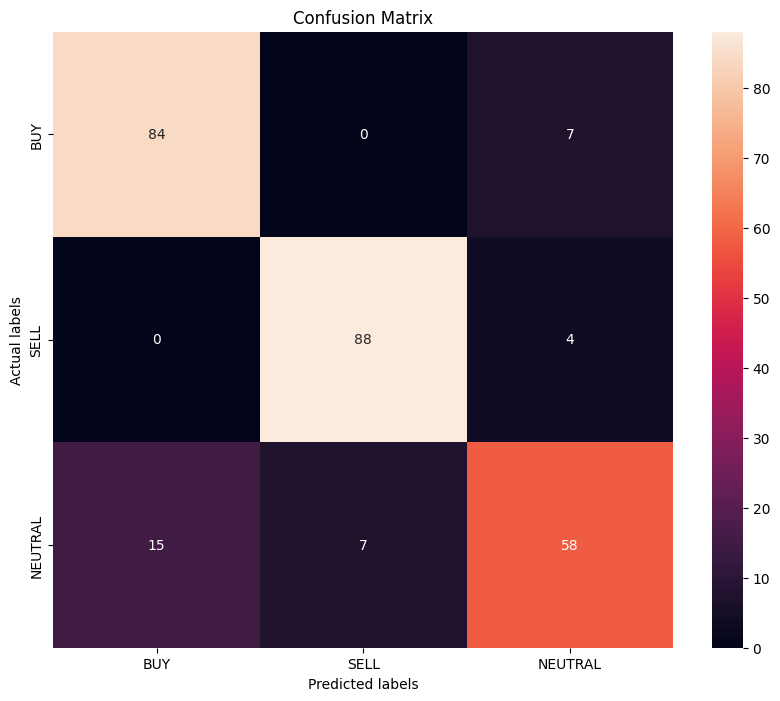

In [112]:
plot_confusion_matrix(x_test, y_test, model_a)

9/9 [==============================] - 0s 10ms/step


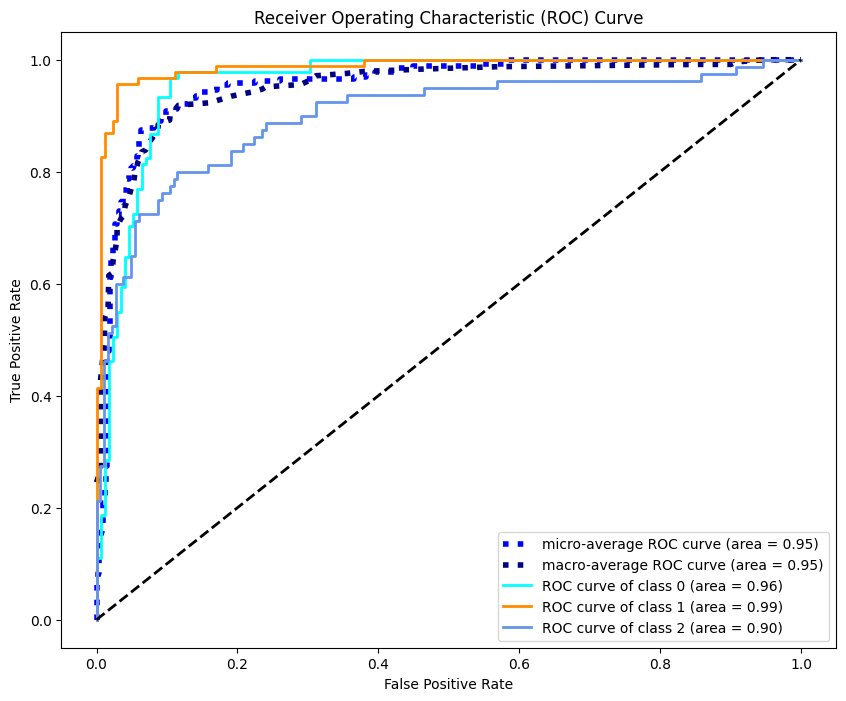

In [113]:
plot_roc_curve(x_test, y_test, model_a)

### Model B

In [114]:
scoreb, accuracyb, f1_scoreb, precisionb, recallb = model_b.evaluate(x_test, y_test, batch_size=settings["model_evaluate_batch_size"], verbose=1)

print("score: {}".format(scoreb))
print("accuracy: {}".format(accuracyb))
print("precision: {}".format(precisionb))
print("recall: {}".format(recallb))
print("f1 score: {}".format(f1_scoreb))

9/9 [==============================] - 0s 15ms/step - loss: 0.6902 - accuracy: 0.6578 - fbeta_score: 0.5961 - precision_1: 0.6946 - recall_1: 0.6312
score: 0.6901816129684448
accuracy: 0.6577946543693542
precision: 0.6945606470108032
recall: 0.6311787366867065
f1 score: [0.75829387 0.7821782  0.24778761]


9/9 [==============================] - 3s 22ms/step
[[80  1 10]
 [ 4 79  9]
 [36 30 14]]


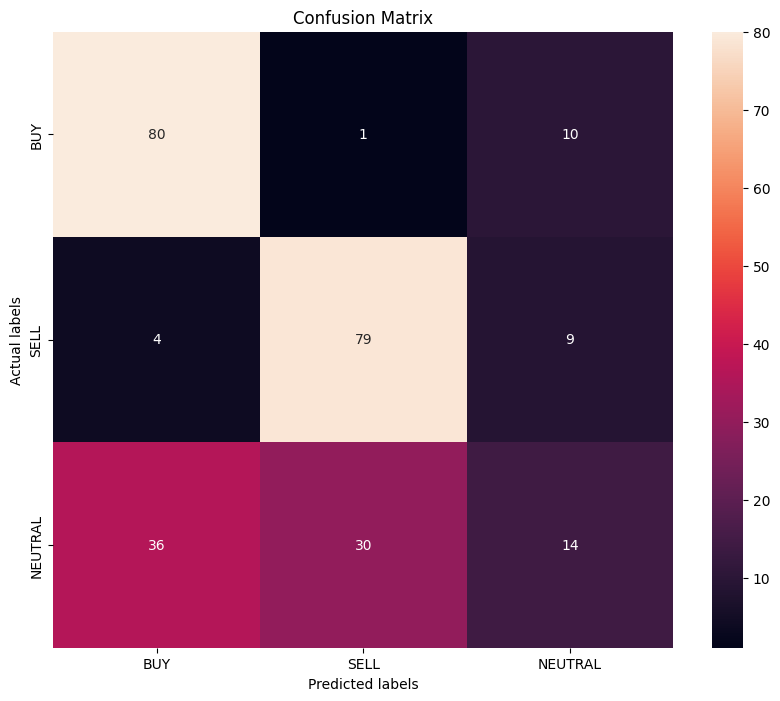

In [115]:
plot_confusion_matrix(x_test, y_test, model_b)

9/9 [==============================] - 0s 17ms/step


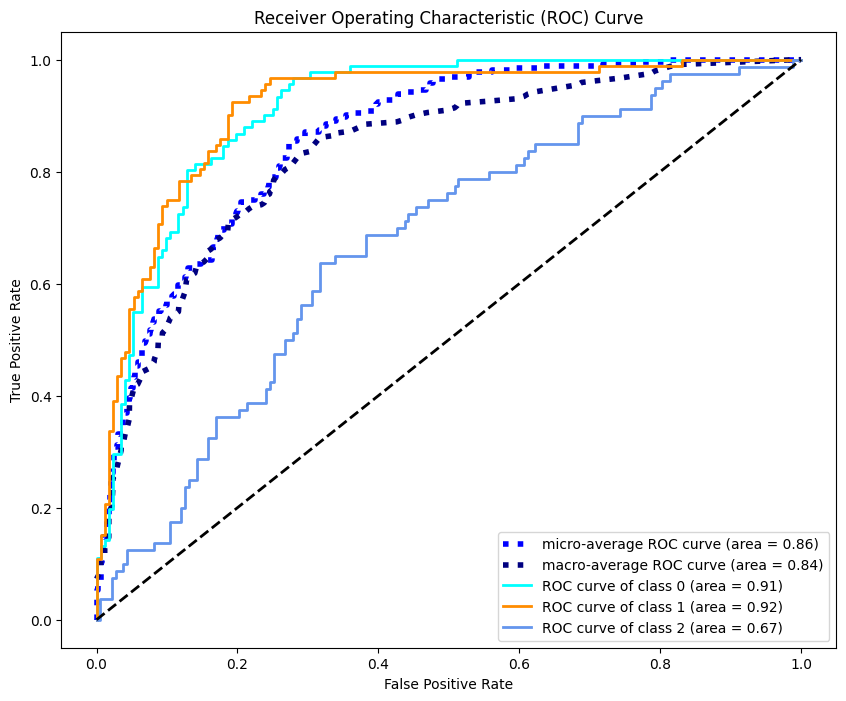

In [116]:
plot_roc_curve(x_test, y_test, model_b)

### Model C

In [117]:
scorec, accuracyc, f1_scorec, precisionc, recallc = model_c.evaluate(x_test, y_test, batch_size=settings["model_evaluate_batch_size"], verbose=1)

print("score: {}".format(scorec))
print("accuracy: {}".format(accuracyc))
print("precision: {}".format(precisionc))
print("recall: {}".format(recallc))
print("f1 score: {}".format(f1_scorec))

9/9 [==============================] - 0s 24ms/step - loss: 0.5531 - accuracy: 0.7795 - fbeta_score: 0.7478 - precision_2: 0.7824 - recall_2: 0.7795
score: 0.5530992746353149
accuracy: 0.7794677019119263
precision: 0.7824427485466003
recall: 0.7794677019119263
f1 score: [0.8426396 0.8640776 0.5365854]


9/9 [==============================] - 5s 15ms/step
[[83  1  7]
 [ 0 89  3]
 [23 24 33]]


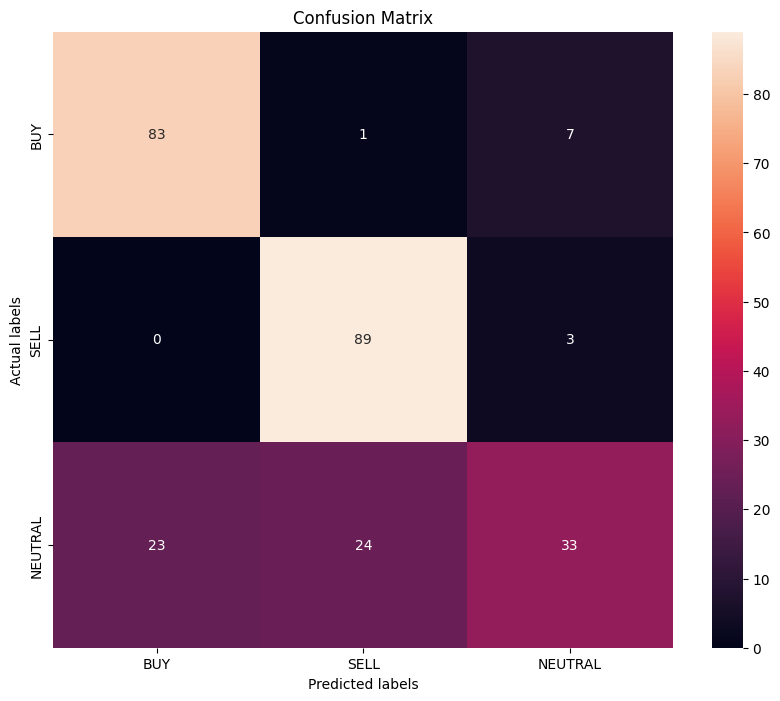

In [118]:
plot_confusion_matrix(x_test, y_test, model_c)

9/9 [==============================] - 0s 24ms/step


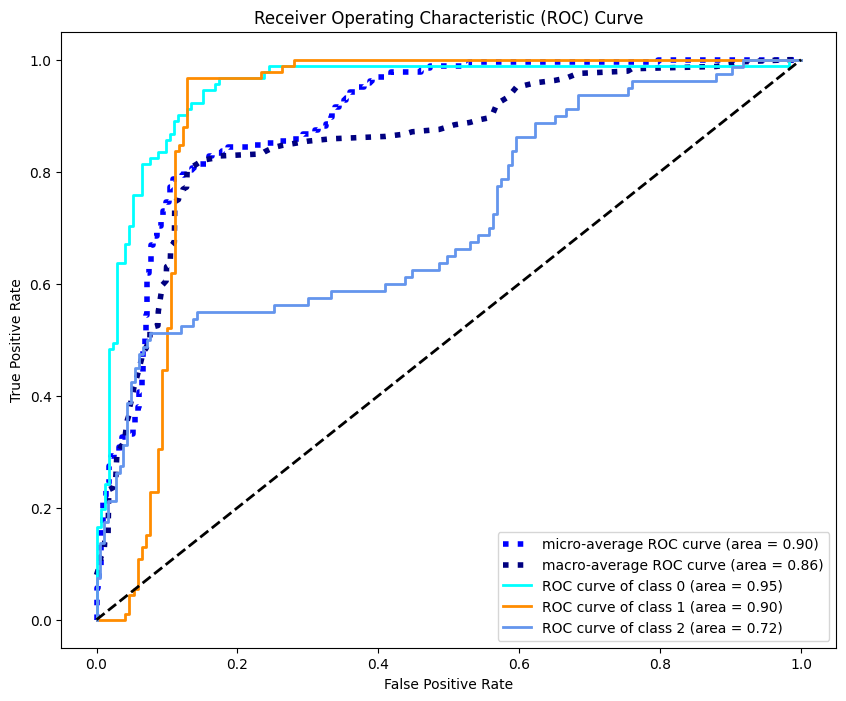

In [119]:
plot_roc_curve(x_test, y_test, model_c)

### Model D

In [120]:
scored, accuracyd, f1_scored, precisiond, recalld = model_d.evaluate(x_test, y_test, batch_size=settings["model_evaluate_batch_size"], verbose=1)

print("score: {}".format(scored))
print("accuracy: {}".format(accuracyd))
print("precision: {}".format(precisiond))
print("recall: {}".format(recalld))
print("f1 score: {}".format(f1_scored))

9/9 [==============================] - 0s 7ms/step - loss: 0.4408 - accuracy: 0.8137 - fbeta_score: 0.8057 - precision_3: 0.8130 - recall_3: 0.8099
score: 0.4408186376094818
accuracy: 0.8136882185935974
precision: 0.8129770755767822
recall: 0.8098859190940857
f1 score: [0.8342246  0.90322584 0.6797386 ]


9/9 [==============================] - 2s 4ms/step
[[78  0 13]
 [ 0 84  8]
 [18 10 52]]


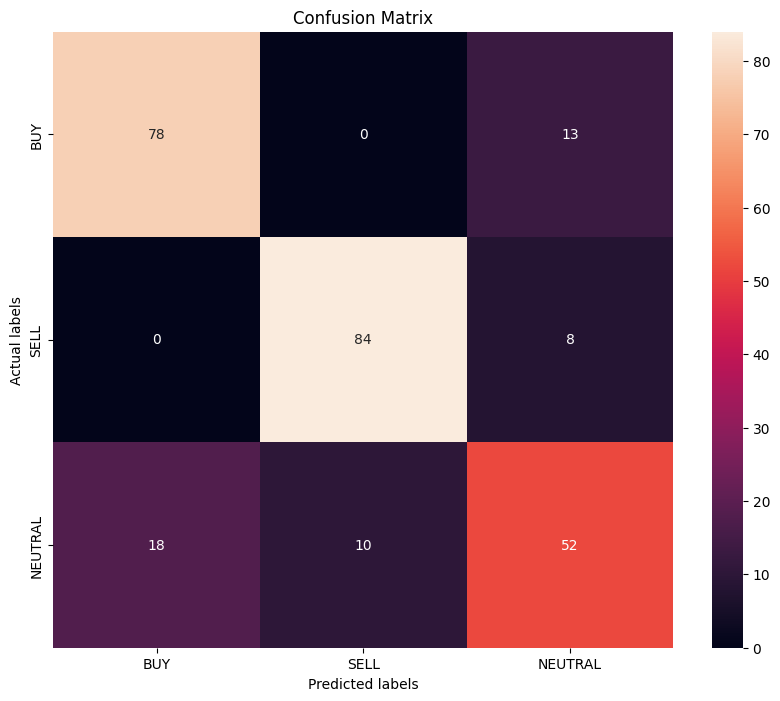

In [121]:
plot_confusion_matrix(x_test, y_test, model_d)

9/9 [==============================] - 0s 8ms/step


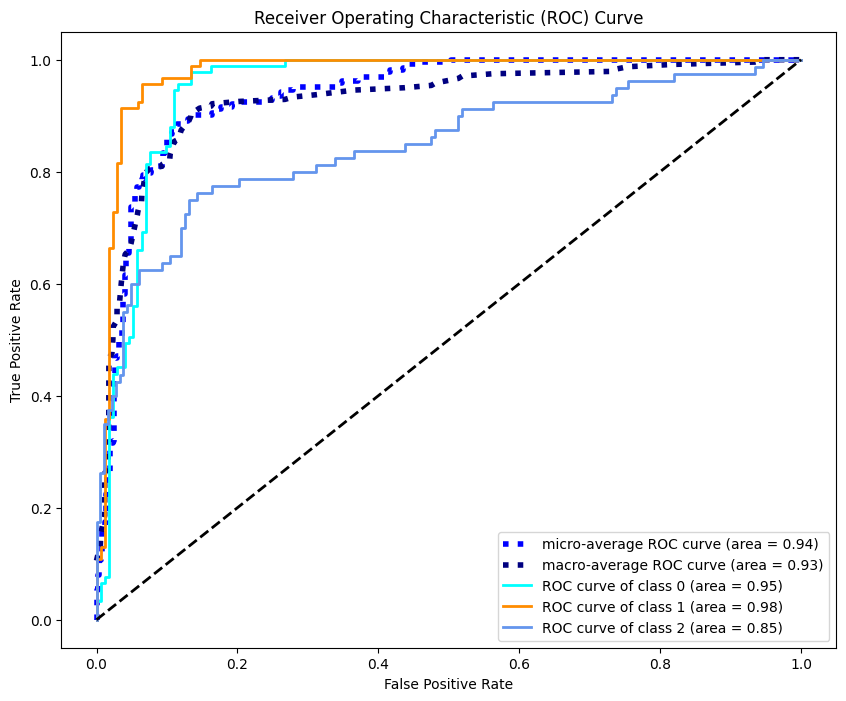

In [122]:
plot_roc_curve(x_test, y_test, model_d)

### Model E

In [123]:
scoree, accuracye, f1_scoree, precisione, recalle = model_e.evaluate(x_test, y_test, batch_size=settings["model_evaluate_batch_size"], verbose=1)

print("score: {}".format(scoree))
print("accuracy: {}".format(accuracye))
print("precision: {}".format(precisione))
print("recall: {}".format(recalle))
print("f1 score: {}".format(f1_scoree))

9/9 [==============================] - 0s 15ms/step - loss: 0.4284 - accuracy: 0.8783 - fbeta_score: 0.8713 - precision_4: 0.8783 - recall_4: 0.8783
score: 0.4284389019012451
accuracy: 0.8783270120620728
precision: 0.8783270120620728
recall: 0.8783270120620728
f1 score: [0.89898986 0.93406594 0.7808219 ]


9/9 [==============================] - 6s 9ms/step
[[89  0  2]
 [ 0 85  7]
 [18  5 57]]


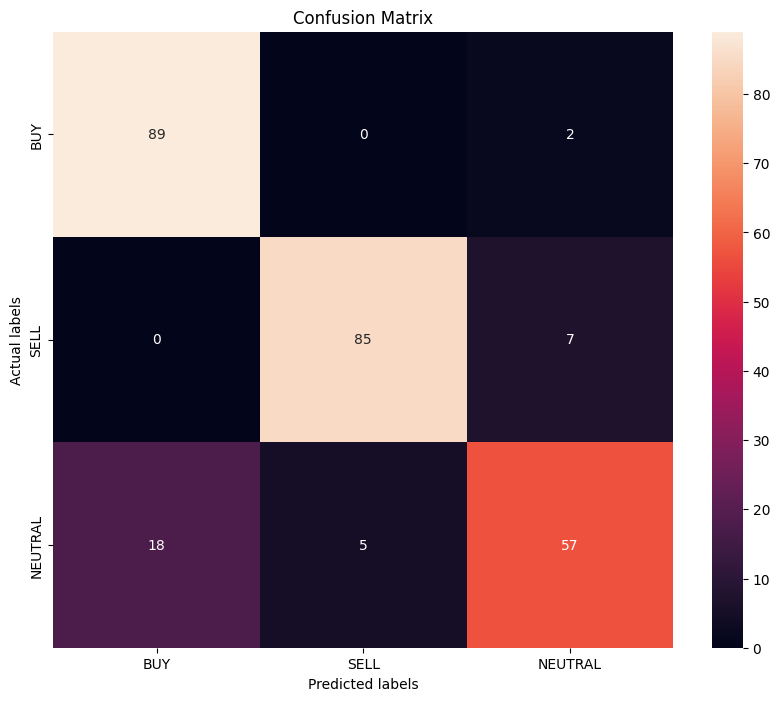

In [124]:
plot_confusion_matrix(x_test, y_test, model_e)

9/9 [==============================] - 0s 13ms/step


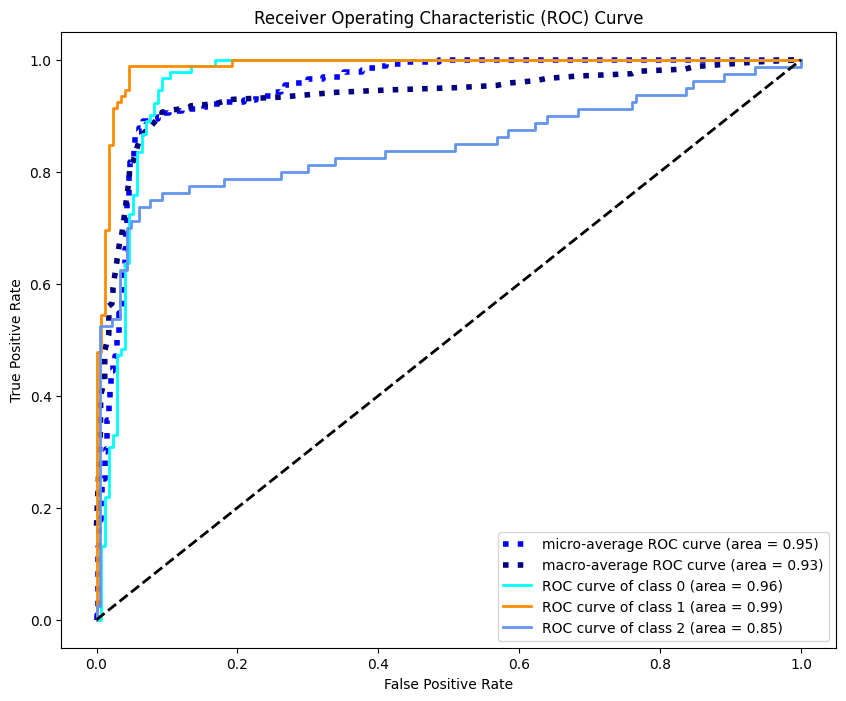

In [125]:
plot_roc_curve(x_test, y_test, model_e)

In [126]:
# stop

# Market Trade Simulation
If you change the variable `real_time` to True it will be display steps by steps.

In [127]:
import time
from typing import Any 

In [128]:
def base_frame_test(frame, train_per, test_per,) -> pd.DataFrame:
    train_size = int(frame.shape[0] * train_per)
    test_size = int(frame.shape[0] * test_per) + train_size
    return frame.loc[train_size : test_size].reset_index()



In [129]:
# TODO: it uses normalized data for now, convert to actual data 
# test_base = base_frame_test(normalize_data_tmp,
#                          settings["split_train"],
#                          settings["split_test"])

# test_base = base_frame_test(features_df,
#                          settings["split_train"],
#                          settings["split_test"])

In [130]:
# array([[0.37988192, 0.24194752, 0.37817058]], dtype=float32) => probabilities of the different classes 
# array[0][0]: buy
# array[0][1]: sell 
# array[0][2]: wait/neutral 

# for idx in range(0, len(x_test)):
#     print((idx, test_base[LABEL_TARGET].loc[idx]))

In [131]:
pred = np.argmax(model_a.predict(x_test), axis=1)

pred

9/9 [==============================] - 0s 9ms/step


array([1, 2, 0, 1, 0, 0, 1, 0, 2, 2, 0, 2, 0, 0, 1, 0, 0, 1, 0, 1, 0, 2,
       1, 0, 1, 0, 1, 0, 2, 1, 0, 1, 0, 1, 2, 0, 2, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 2, 1, 0, 1, 0, 1, 2, 0, 0, 2, 1, 0, 2,
       1, 0, 1, 0, 2, 1, 0, 1, 0, 1, 1, 0, 0, 1, 2, 0, 2, 2, 0, 1, 2, 0,
       1, 0, 1, 2, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 2, 1, 2, 2, 0, 1, 2, 0,
       2, 1, 0, 1, 0, 1, 0, 0, 1, 2, 0, 1, 2, 1, 0, 1, 0, 2, 2, 1, 0, 1,
       2, 0, 2, 2, 1, 0, 1, 0, 1, 2, 0, 1, 0, 2, 2, 2, 1, 0, 2, 1, 0, 2,
       2, 2, 2, 0, 1, 0, 1, 2, 2, 0, 1, 2, 0, 1, 0, 1, 0, 2, 1, 2, 0, 1,
       0, 2, 1, 0, 0, 2, 1, 2, 0, 1, 0, 1, 2, 2, 1, 0, 1, 0, 1, 2, 0, 1,
       0, 0, 2, 1, 0, 2, 1, 0, 1, 1, 2, 2, 2, 1, 2, 2, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 2, 1, 0, 2, 1, 0, 1, 2, 0, 1, 0, 1, 0, 2, 1, 0, 0, 2,
       1, 2, 0, 1, 0, 1, 2, 2, 2, 2, 1, 2, 1, 0, 2, 1, 0, 1, 0, 1, 1])

In [132]:
# pred = np.where(model_a.predict(x_test) > 0.5, 1, 0)

In [133]:
# test_base['prediction'] = np.where(pred > 0, 1, -1)

In [134]:
# test_base['prediction'] = pred

In [135]:
# test_base['prediction'].value_counts()

In [136]:
# test_base['strategy'] = (test_base['prediction'] * test_base['return']) # test_base['PCTRET_1']

In [137]:
# test_base[['return', 'strategy']].sum().apply(np.exp)

In [138]:
# test_base[['return', 'strategy']].cumsum().apply(np.exp).plot(figsize=(10, 6), color=colors("BkGrOrRd"), title="Cumulative Returns", grid=True)

In [139]:
from enum import Enum

class TradeType(Enum):
    BUY = "BUY"
    SELL = "SELL"
    NEUTRAL = "NEUTRAL"
    
class Trade:
    def __init__(self, price: float, volume: float, entry: float, stop_loss: float, take_profit: float, trade_type: TradeType) -> None:
        self.price = price
        self.volume = volume
        self.entry = entry
        self.stop_loss = stop_loss
        self.take_profit = take_profit
        self.trade_type = trade_type

    def __str__(self) -> str:
        return (f"Price: {self.price} | Volume: {self.volume} | Entry: {self.entry} | "
                f"StopLoss: {self.stop_loss} | TakeProfit: {self.take_profit} | "
                f"TradeType: {self.trade_type}")
        

class MarketSimulator:
    """
        Market Simulator 
    """
    def __init__(self, market_data: pd.DataFrame, model_test_data: np.ndarray, model: Any, starting_capital: float = 1000.0, real_time: bool = False) -> None:
        self.market_data = market_data[LABEL_TARGET]
        self.model_test_data = model_test_data
        self.model = model
        self.starting_capital = starting_capital
        self.current_capital = starting_capital
        self.profit = 0.0
        self.trades: list[Trade] = [] # type: ignore
        self.open_positions: list[tuple[int, Trade]] = [] # type: ignore
        self.closed_positions: list[tuple[int, Trade]] = [] # type: ignore
        self.capital_history: list[tuple[int, float]] = [] # type: ignore # Track capital changes
        self.real_time = real_time
    
    def _process_order(self, idx: int, order: Trade) -> None:
        if order is None:
            return

        if self.real_time:
            self.plot_trades_realtime(idx, order)
        else:
            print(f"Trade Id: {idx} | Price: {order.price} | Current Balance: {self.current_capital} | Type: {order.trade_type}")

    def place_order(self, idx: int, order: Trade) -> None:
        if self.current_capital > 0:
            self.current_capital -= order.price * order.volume
            self.open_positions.append((idx, order))
            self.capital_history.append((idx, self.current_capital))

        if order.trade_type == TradeType.BUY:
            # Handle buy order logic
            pass

        elif order.trade_type == TradeType.SELL:
            # Handle sell order logic
            pass

        self._process_order(idx, order)
        
    def get_current_capital(self) -> float:
        return self.current_capital

    def get_profit(self) -> float:
        return self.profit        
    
    def get_balance(self) -> float:
        return self.current_capital
    
    def get_profit(self) -> float:
        return self.profit 
    
    def get_model_prediction(self, idx: int) -> TradeType:
        """
            Predicts the trade action (BUY, SELL, or NEUTRAL) based on the model.

            Args:
                idx (int): Index of the data point for prediction.

            Returns:
                TradeType: Predicted trade action (BUY, SELL, or NEUTRAL).
        """
        tmp = np.array([self.model_test_data[idx]])
        prediction = self.model.predict(tmp)
        
        if prediction[:, 0] == max(prediction[0]):
            return TradeType.BUY
        
        if prediction[:, 1] == max(prediction[0]):
            return TradeType.SELL
        
        return TradeType.NEUTRAL
    
    def plot_trades_realtime(self, idx: int, order: Trade) -> None:
        """
        Plots the trades and capital history in real-time mode.

        Args:
            idx (int): Index of the data point.
            order (Trade): Trade object representing the current order.
        """

        print(f"Trade Id: {idx} | Price: {order.price} | Current Balance: {self.current_capital} | Type: {order.trade_type}")
        time.sleep(1)
        clear_output(wait=True)  # Assuming you're using a Jupyter Notebook environment

        fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16, 8))
        ax1.plot(self.market_data.iloc[:idx])
        
        buy_invest_open_positions = [(i, x) for i, x in enumerate(self.market_data.iloc[:idx]) if (len(self.open_positions) > 0 and self.open_positions[0][0] == i)]
        sell_invest_open_positions = [(i, x) for i, x in enumerate(self.market_data.iloc[:idx]) if (len(self.open_positions) > 0 and self.open_positions[0][1].trade_type == TradeType.SELL and self.open_positions[0][0] == i)]
        
        # buy_invest_closed_positions = [(i, x) for i, x in enumerate(self.market_data.iloc[:idx]) if (len(self.closed_positions) > 0 and self.closed_positions[0][0] == i)]
        # sell_invest_closed_positions = [(i, x) for i, x in enumerate(self.market_data.iloc[:idx]) if (len(self.closed_positions) > 0 and self.closed_positions[0][1].trade_type == TradeType.SELL and self.closed_positions[0][0] == i)]
        
        ax1.plot(*zip(*buy_invest_open_positions), "go", label="buy")
        # ax1.plot(*zip(*buy_invest_closed_positions), "bo", label="close buy")
        ax1.plot(*zip(*sell_invest_open_positions), "ro", label="sell")
        # ax1.plot(*zip(*sell_invest_closed_positions), "wo", label="close sell")
        ax1.grid(True)
        ax1.legend()
        ax1.set_title("Price History")

        ax2.plot(*zip(*self.capital_history), "g", label="capital")
        ax2.grid(True)
        ax2.legend()
        ax2.set_title("Capital History")

        plt.tight_layout()
        plt.show()
        
    
    def close_position(self, idx: int) -> None:
        """
            Closes an open position based on order and updates capital.

            Args:
                idx (int): Index of the data point.
        """

        if len(self.open_positions) > 0:
            position_idx, position = self.open_positions.pop(0)

            # (self.market_data.iloc[idx] + position.price)
            if position.trade_type == TradeType.BUY:
                # Check for stop-loss or take-profit conditions
                if self.market_data.iloc[idx] <= position.stop_loss:
                    # Update capital based on closed position price and volume
                    self.current_capital -= position.price * position.volume
                    self.capital_history.append((idx, self.current_capital))
                    self.closed_positions.append((position_idx, position))

                elif self.market_data.iloc[idx] >= position.take_profit:
                    # Update capital based on closed position price and volume
                    self.current_capital += position.price * position.volume
                    self.capital_history.append((idx, self.current_capital))
                    self.closed_positions.append((position_idx, position))
                    
                else:
                    # Re-add the position to open_positions if not triggered by stop-loss or take-profit
                    self.open_positions.insert(0, (position_idx, position))
            
            if position.trade_type == TradeType.SELL:
                # Check for stop-loss or take-profit conditions
                if self.market_data.iloc[idx] >= position.stop_loss:
                    # Update capital based on closed position price and volume
                    self.current_capital -= position.price * position.volume
                    self.capital_history.append((idx, self.current_capital))
                    self.closed_positions.append((position_idx, position))

                elif self.market_data.iloc[idx] <= position.take_profit:
                    # Update capital based on closed position price and volume
                    self.current_capital += position.price * position.volume
                    self.capital_history.append((idx, self.current_capital))
                    self.closed_positions.append((position_idx, position))
                
                else:
                    # Re-add the position to open_positions if not triggered by stop-loss or take-profit
                    self.open_positions.insert(0, (position_idx, position))

            # print closed positions 
            if len(self.closed_positions) > 0:
                closed_position_idx, closed_position = self.closed_positions[-1]
                print(f"Closed Position Id: {closed_position_idx} | Closed Position: {closed_position}")
                # print(f"Closed Position Id: {closed_position_idx} | Entry Price: {closed_position.entry} | Stop loss: {closed_position.stop_loss} | Take profit: {closed_position.take_profit}")
            

    def run(self) -> None:
        """
            Runs the market simulation based on model predictions.
        """

        self.capital_history.append((0, self.current_capital))

        for idx in range(len(self.model_test_data)):
            prediction = self.get_model_prediction(idx)
            order = None

            if prediction == TradeType.BUY:
                stop_loss = self.market_data.iloc[idx] * 0.95
                take_profit = self.market_data.iloc[idx] + (self.market_data.iloc[idx] * 0.05)  # Alternative take-profit calculation
                order = Trade(self.market_data.iloc[idx], 1, self.market_data.iloc[idx], stop_loss, take_profit, prediction)
                self.place_order(idx, order)

            elif prediction == TradeType.SELL:
                stop_loss = self.market_data.iloc[idx] * 1.05
                take_profit = self.market_data.iloc[idx] - (self.market_data.iloc[idx] * 0.05)  # Alternative take-profit calculation
                order = Trade(self.market_data.iloc[idx], 1, self.market_data.iloc[idx], stop_loss, take_profit, prediction)
                self.place_order(idx, order)

            elif prediction == TradeType.NEUTRAL:
                self._process_order(idx, None)

            # Check for open positions and close them based on stop-loss/take-profit conditions
            if len(self.open_positions) > 0:
                self.close_position(idx)




In [140]:
# Run the market simulator
# market = MarketSimulator(test_base, x_test, model_a, starting_capital=10, real_time=True)
# market.run()

In [141]:
# market.get_balance()

In [142]:

# real_time = True
# capital = 10
# start_capital = 10
# buy_invest = []
# sell_invest = []
# trade = []
# trade_type = None
# type_price = None
# percentage = None
# tab_capital = []
# tab_capital.append((0, capital))

# for i in range(0, len(x_test)):
#     tmp = np.array([x_test[i]])
#     prediction = model_a.predict(tmp)
    
#     if prediction[:, 0] == max(prediction[0]):
#         # if trade_type is None and capital > 0:
#         if capital > 0:
#             buy_invest.append((i, test_base[LABEL_TARGET].loc[i]))
#             trade.append((i, test_base[LABEL_TARGET].loc[i]))
#             trade_type = True
#             type_price = "buy"
            
#     if prediction[:, 1] == max(prediction[0]):
#         # if trade_type == True:
#         if capital > 0:
#             newCap = trade.pop()
#             val = capital / newCap[1]
#             newCap = val * test_base[LABEL_TARGET].loc[i]
#             capital = newCap
#             sell_invest.append((i, test_base[LABEL_TARGET].loc[i]))
#             # trade_type = None
#             tab_capital.append((i, capital))
#             type_price = "sell"
            
#     if real_time == True:
#         time.sleep(1)
#         clear_output(wait=True)
        
#         fig = plt.figure(figsize=(16,8))
#         test_base[LABEL_TARGET].loc[0:i].plot()
#         buy_invest_tmp = np.array(buy_invest)
#         sell_invest_tmp = np.array(sell_invest)
#         print("Capital Start amount : ", start_capital)
#         if type_price is not None:
#             print("actual action : ", type_price)
#         if len(buy_invest)  > 0:
#             plt.plot(buy_invest_tmp[:,0], buy_invest_tmp[:,1], "go", label="buy")
#         if len(sell_invest)  > 0:
#             plt.plot(sell_invest_tmp[:,0], sell_invest_tmp[:,1], "ro", label="sell")
#         print("capital : ", capital)
#         plt.grid()
#         plt.legend()
#         plt.show()

#         fig = plt.figure(figsize=(8,4))
#         tab_tmp = np.array(tab_capital)
#         plt.plot(tab_tmp[:,0],tab_tmp[:,1], "g", label="capital")
#         plt.grid()
#         plt.legend()
#         plt.show()
        
        
# clear_output(wait=True)

# time.sleep(1)
# fig = plt.figure(figsize=(16,8))
# buy_invest_tmp = np.array(buy_invest)
# sell_invest_tmp = np.array(sell_invest)

# test_base[LABEL_TARGET].loc[0:i].plot()
# if len(buy_invest)  > 0:
#     plt.plot(buy_invest_tmp[:,0], buy_invest_tmp[:,1], "go", label="buy")
# if len(sell_invest)  > 0:
#     plt.plot(sell_invest_tmp[:,0], sell_invest_tmp[:,1], "ro", label="sell")

# print("Capital Start amount : ", start_capital)
# if type_price is not None:
#     print("actual action : ", type_price)
# print("capital end : ", capital)

# plt.grid()
# plt.legend()
# plt.show()
        
# fig = plt.figure(figsize=(16,8))
# tab_tmp = np.array(tab_capital)
# plt.plot(tab_tmp[:,0],tab_tmp[:,1], "g", label="capital")
# plt.grid()
# plt.legend()
# plt.show()

# Dump

In [143]:
# def lstmNeuronsNumber(frame, setting):
#     Ni = len(setting["labelisation_features_name"])
#     No = len(setting["labelisation_labels_name"])
#     Ns = frame.shape[0]
#     a = setting["delta_neurons_numbers"]
#     return int(Ns / (a * (Ni + No)))


In [144]:

# def generate_data(dataset, timestep, xcols, ycols):
#     dx, dy = [], []
#     for i in range(len(dataset) - timestep):
#         a = dataset.iloc[i : i + timestep][xcols]
#         dx.append(np.array(a))
#         dy.append(dataset.iloc[i + timestep  - 1][ycols])
#     return np.array(dx), np.array(dy)

# def balance_labelisation(frame, label):
#     buy = int(label[:,0].sum())
#     sell = int(label[:,1].sum())
#     neutral = int(label[:,2].sum())
    
#     need_delete = neutral - min(sell, buy)
    
#     tab_neutral = [i for i, l in enumerate(label)if l[2] == 1]
#     rand_delete = np.random.choice(tab_neutral, need_delete, replace=False)
#     final_frame = np.delete(frame, rand_delete, axis=0)
#     final_label = np.delete(label, rand_delete, axis=0)
#     final_frame = np.array(final_frame)
#     final_label = np.array(final_label)
#     return final_frame, final_label

# def split_train(frame, train_per, test_per, timestep, xcols, ycols, balance=False):
#     x_tmp, y_tmp = generate_data(frame, timestep, xcols, ycols)
#     if balance is True:
#         x_tmp, y_tmp =  balance_labelisation(x_tmp, y_tmp)
        
#     train_size = int(x_tmp.shape[0] * train_per)
#     test_size = int(x_tmp.shape[0] * test_per) + train_size

#     x_train = x_tmp[: train_size]
#     y_train = y_tmp[: train_size]
#     x_test = x_tmp[train_size : test_size]
#     y_test = y_tmp[train_size : test_size]
    
#     x_train = x_train.astype(np.float32)
#     y_train = y_train.astype(np.float32) # int64
#     x_test = x_test.astype(np.float32)
#     y_test = y_test.astype(np.float32) # int64
#     return x_train, y_train, x_test, y_test


# x_train, y_train, x_test, y_test = split_train(labeled_normalize_df,
#                                                      settings["split_train"],
#                                                      settings["split_test"],
#                                                      settings["nb_per_bloc"],
#                                                      settings["labelisation_features_name"],
#                                                      settings["labelisation_labels_name"],
#                                                      balance=settings["is_balance"])


In [145]:

# def setSell(idx, peaksmax, peaksmin):
#     for i in peaksmax:
#         if i[0] == idx:
#             return 1.0
#     for i in peaksmin:
#         if i[0] == idx:
#             return 0.0
#     return 0.0

# def setNeutral(idx, peaksmax, peaksmin):
#     for i in peaksmax:
#         if i[0] == idx:
#             return 0.0
#     for i in peaksmin:
#         if i[0] == idx:
#             return 0.0
#     return 1.0

# def setBuy(idx, peaksmax, peaksmin):
#     for i in peaksmax:
#         if i[0] == idx:
#             return 0.0
#     for i in peaksmin:
#         if i[0] == idx:
#             return 1.0
#     return 0.0

# def frame_labelization(frame_base, maxp, minp, data):
#     frame_base["neutral"] = [setNeutral(d, maxp, minp) for d in range(len(data[0]["data"]))]
#     frame_base["sell"] = [setSell(d, maxp, minp) for d in range(len(data[0]["data"]))]
#     frame_base["buy"] = [setBuy(d, maxp, minp) for d in range(len(data[0]["data"]))]
#     return frame_base


In [146]:
# #normalize class
# class Normalisation:
#     def __init__(self, data):
#         self.__marketList = [e["name"] for e in data]
#         self.__data = [e["data"] for e in data]
#         self.__format = False
        
        
#     def __norme_MinMax(self, target, numerical_markets):
#         scaler = MinMaxScaler()
#         normalized_markets = []
#         if target == "all":
#             for market in numerical_markets:
#                 columns_name= market.columns
#                 market[columns_name] = scaler.fit_transform(market[columns_name])
#                 normalized_markets.append(market.reset_index())
#             self.__normalizeData = normalized_markets
#         else:
#             for marketName, market in zip(self.__marketList, numerical_markets):
#                 if marketName in target:
#                     columns_name= market.columns
#                     market[columns_name] = scaler.fit_transform(market[columns_name])
#                     normalized_markets.append(market.reset_index())
#             self.__normalizeData = normalized_markets
    
#     def __norme_StandarScaler(self, target, numerical_markets):
#         scaler = StandardScaler()
#         normalized_markets = []
#         if target == "all":
#             for market in numerical_markets:
#                 columns_name= market.columns
#                 market[columns_name] = scaler.fit_transform(market[columns_name])
#                 normalized_markets.append(market.reset_index())
#             self.__normalizeData = normalized_markets
#         else:
#             for marketName, market in zip(self.__marketList, numerical_markets):
#                 if marketName in target:
#                     columns_name= market.columns
#                     market[columns_name] = scaler.fit_transform(market[columns_name])
#                     normalized_markets.append(market.reset_index())
#             self.__normalizeData = normalized_markets
    
#     def __norme_Normalizer_l(self, target, numerical_markets, norme):
#         scaler = Normalizer(norme)
#         normalized_markets = []
#         if target == "all":
#             for market in numerical_markets:
#                 columns_name= market.columns
#                 market[columns_name] = scaler.fit_transform(market[columns_name])
#                 normalized_markets.append(market)
#             self.__normalizeData = normalized_markets
#         else:
#             for marketName, market in zip(self.__marketList, numerical_markets):
#                 if marketName in target:
#                     columns_name= market.columns
#                     market[columns_name] = scaler.fit_transform(market[columns_name])
#                     normalized_markets.append(market.reset_index())
#             self.__normalizeData = normalized_markets
            
#     def fit(self, normeType, featuresList, target="all"):
#         numerical_markets = []
#         for market in self.__data:
#             numerical_markets.append(market[featuresList]._get_numeric_data())
#         if normeType == "MinMax":
#             print("MinMax Normalization.")
#             self.__norme_MinMax(target, numerical_markets)
            
#         elif normeType == "StandarScale":
#             print("StandarScale Normalization.")
#             self.__norme_StandarScaler(target, numerical_markets)
        
#         elif normeType == "Normalizer_l1":
#             print("Normalizer_l1 Normalization.")
#             self.__norme_Normalizer_l(target, numerical_markets, "l1")
        
#         elif normeType == "Normalizer_l2":
#             print("Normalizer_l2 Normalization.")
#             self.__norme_Normalizer_l(target, numerical_markets, "l2")
    
#     #return the data normalize
#     def get_normalize_data(self, idx):
#         return self.__normalizeData[idx]

In [147]:

# # noramlize: MinMax | StandarScale | Normalizer_l1 | Normalizer_l2 
# settings = dict({"ticker_file": "tickers.csv",
#                  "markets_target": ["BTC-NEO"],
#                  "normalisation_fit_type": "StandarScale",
#                  "normalisation_fit_target": "all",
#                  "normalisation_target": "bid",
#                  "labelisation_disparity": 0.065,
#                  "labelisation_features_name": ["ask", "bid", "high", "low", "moy_prev_day"],
#                  "labelisation_labels_name": ["buy", "sell", "wait"],
#                  "is_balance": True,
#                  "split_train": 0.7,
#                  "split_test": 0.3,
#                  "nb_per_bloc": 50,
#                  "delta_neurons_numbers": 2, # delta {2-10}
#                  "model_optimizer": "adam",
#                  "model_loss": "mse",
#                  "model_epoch": 70,
#                  "model_batch_size": 50,
#                  "model_validation_split": 0.1,
#                  "model_shuffle": True,
#                  "model_evaluate_batch_size": 100
#                 })


# # Peaks detection function
# def peakdet(v, delta, x = None):
#     maxtab = []
#     mintab = []
#     if x is None:
#         x = np.arange(len(v))
#     v = np.asarray(v)
#     mn, mx = np.Inf, -np.Inf
#     mnpos, mxpos = np.NaN, np.NaN
#     lookformax = True
#     for i in np.arange(len(v)):
#         this = v[i]
#         if this > mx:
#             mx = this
#             mxpos = x[i]
#         if this < mn:
#             mn = this
#             mnpos = x[i]

#         if lookformax:
#             if this < mx-delta:
#                 maxtab.append((mxpos, mx))
#                 mn = this
#                 mnpos = x[i]
#                 lookformax = False
#         else:
#             if this > mn+delta:
#                 mintab.append((mnpos, mn))
#                 mx = this
#                 mxpos = x[i]
#                 lookformax = True

#     return np.array(maxtab), np.array(mintab)

In [148]:
# MODEL
# model = Sequential()
# model.add(Input(shape=(x_train.shape[1], x_train.shape[2])))

# model.add(LSTM(settings["model_neural"], activation='tanh', return_sequences=True))
# model.add(LSTM(settings["model_neural"], activation='tanh', return_sequences=True))
# model.add(Dropout(0.2))
# model.add(Bidirectional(LSTM(settings["model_neural"], activation='tanh', return_sequences=True)))  
# model.add(LSTM(settings["model_neural_hidden"], activation='relu', return_sequences=True))
# model.add(Dropout(0.2))
# TCN branch
# model.add(TCN(nb_filters=128, kernel_size=6, dropout_rate=0.2, activation='relu', padding='causal', return_sequences=True))
# model.add(Dropout(0.2))
# Bidirectional LSTM
# model.add(Bidirectional(LSTM(settings["model_neural"], activation='tanh', return_sequences=True)))  
# model.add(Bidirectional(LSTM(settings["model_neural"], activation='tanh', return_sequences=True)))  
# model.add(LSTM(settings["model_neural_hidden"], activation='tanh'))
# model.add(Dense(y_train.shape[1], activation='softmax'))
# model.compile(optimizer=settings["model_optimizer"], loss=settings["model_loss"], metrics=['accuracy'])

# model.summary()


In [149]:
    # def close_position(self, id: int, order: Trade) -> None:
    #     if len(self.open_positions) > 0:
    #         # Implement logic to close position based on order and update capital
    #         new_cap = self.open_positions.pop() # self.open_positions[-1] # 
    #         val = self.balance / new_cap[1].Price
    #         new_cap = val * order.Price
    #         self.balance = new_cap
                
    #     return

In [150]:
# class Trade:
#     Price = 0
#     Volume = 0
#     Entry = 0
#     StopLoss = 0  # Exit 1 = 0
#     TakeProfit = 0 # Exit 2 = 0
#     TradeType: TradeType = "BUY" | "SELL"
    
#     def __init__(self, price: float, volume: float, entry: float, stop_loss: float, take_profit: float, trade_type: str) -> None:
#         self.Price = price
#         self.Volume = volume
#         self.Entry = entry
#         self.StopLoss = stop_loss
#         self.TakeProfit = take_profit
#         self.TradeType = trade_type
        
#     def __str__(self) -> str:
#         return f"Price: {self.Price} | Volume: {self.Volume} | Entry: {self.Entry} | StopLoss: {self.StopLoss} | TakeProfit: {self.TakeProfit} | TradeType: {self.TradeType}"
    

In [151]:
        
            # if row["buy"] == 1:
            #     self.buy(row["close"], 1)
            # elif row["sell"] == 1:
            #     self.sell(row["close"], 1)
            # else:
            #     self.wait()
                
            # self.trade.append(self.get_balance())


In [152]:
# if __name__ == "__main__":
#     meta_trader = MetaTrader(authorization_code="123456")

#     # Connect to the server
#     meta_trader.connect()

#     # Send a request to the server
#     print(meta_trader.accountInfo())
#     # print(meta_trader.balance())
#     # print(meta_trader.get_orders())
#     # while True:
#     #     print(meta_trader.get_current_price("Step Index"))
#     #     time.sleep(3)

#     # print(
#     #     meta_trader.get_historical_data(
#     #         symbol="Step Index",
#     #         time_frame=TIME_FRAMES.D1,
#     #         action_type=ACTION_TYPE.PRICE,
#     #         from_date="13-02-2022 00:00:00",
#     #         to_date="13-02-2024 00:00:00",
#     #     )
#     # )

#     # current_price = meta_trader.get_current_price("Step Index")
#     # print(current_price)
#     # pips = 100
#     # stop_level = 0.1
#     # normalized_pips = pips * stop_level

#     # BUY
#     # stoploss = float(current_price["data"]["tick"][1]) - normalized_pips
#     # takeprofit = float(current_price["data"]["tick"][1]) + normalized_pips

#     # print(stoploss, takeprofit)
#     # print(meta_trader.buy("Step Index", 0.1, stoploss, takeprofit))

#     # SELL
#     # stoploss = float(current_price["data"]["tick"][2]) + normalized_pips
#     # takeprofit = float(current_price["data"]["tick"][2]) - normalized_pips

#     # print(stoploss, takeprofit)
#     # print(meta_trader.sell("Step Index", 0.5, stoploss, takeprofit))

#     # Positions & Manipulation
#     # positions = meta_trader.get_positions()
#     # print(positions)
#     # print(meta_trader.close_all_positions())